# Categorical plots
## Statistical Estimation within Categories
### Part 1: Understanding the plots

* The categorical plots discussed here will display a statistical metrics **per** a category
* For example mean value per category or a count of the number of rows **per** category
* It is visualization equivalent of a **groupby()** call
* The two main types of plots for this are:
    * countplot()
        * Counts number of rows per category
    * barplot()
        * General form of displaying any chosen metric per category
        * The general form that allows to choose any measure or estimator for the y axis
        * A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the <b>uncertainty around that estimate using error bars</b>. Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it.

# Important note
* Be very careful with these plots, since the bar is filled and continuous, the viewer may interpret continuity along the y-axis which may be incorrect!
* Always make sure to add additional labeling and explanation for these plots
* When bar plot showing mean and SD bar => not clearly show the exact number => show the table instead
* The purpose of the visualization is to make digesting the information easier on the viewer

### Part 2: Code with seaborn
#### Import the environment

In [17]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
mpl.rcParams.update({"figure.facecolor": "white",
                     "font.size": 15,
                     "xtick.labelsize": 11,
                     "ytick.labelsize": 11})

In [19]:
df = pd.read_csv(filepath_or_buffer=r'C:\Users\admin\Desktop\Data Science\Course-2021\05-Seaborn\dm_office_sales.csv')

In [20]:
df.head()

division  level of education  training level  work experience  \
0         printers        some college               2                6   
1         printers  associate's degree               2               10   
2      peripherals         high school               0                9   
3  office supplies  associate's degree               2                5   
4  office supplies         high school               1                5   

   salary   sales  
0   91684  372302  
1  119679  495660  
2   82045  320453  
3   92949  377148  
4   71280  312802

#### Countplot


In [21]:
df['division'].value_counts()

office supplies      252
printers             250
peripherals          243
computer hardware    159
computer software     96
Name: division, dtype: int64

<AxesSubplot:xlabel='division', ylabel='count'>

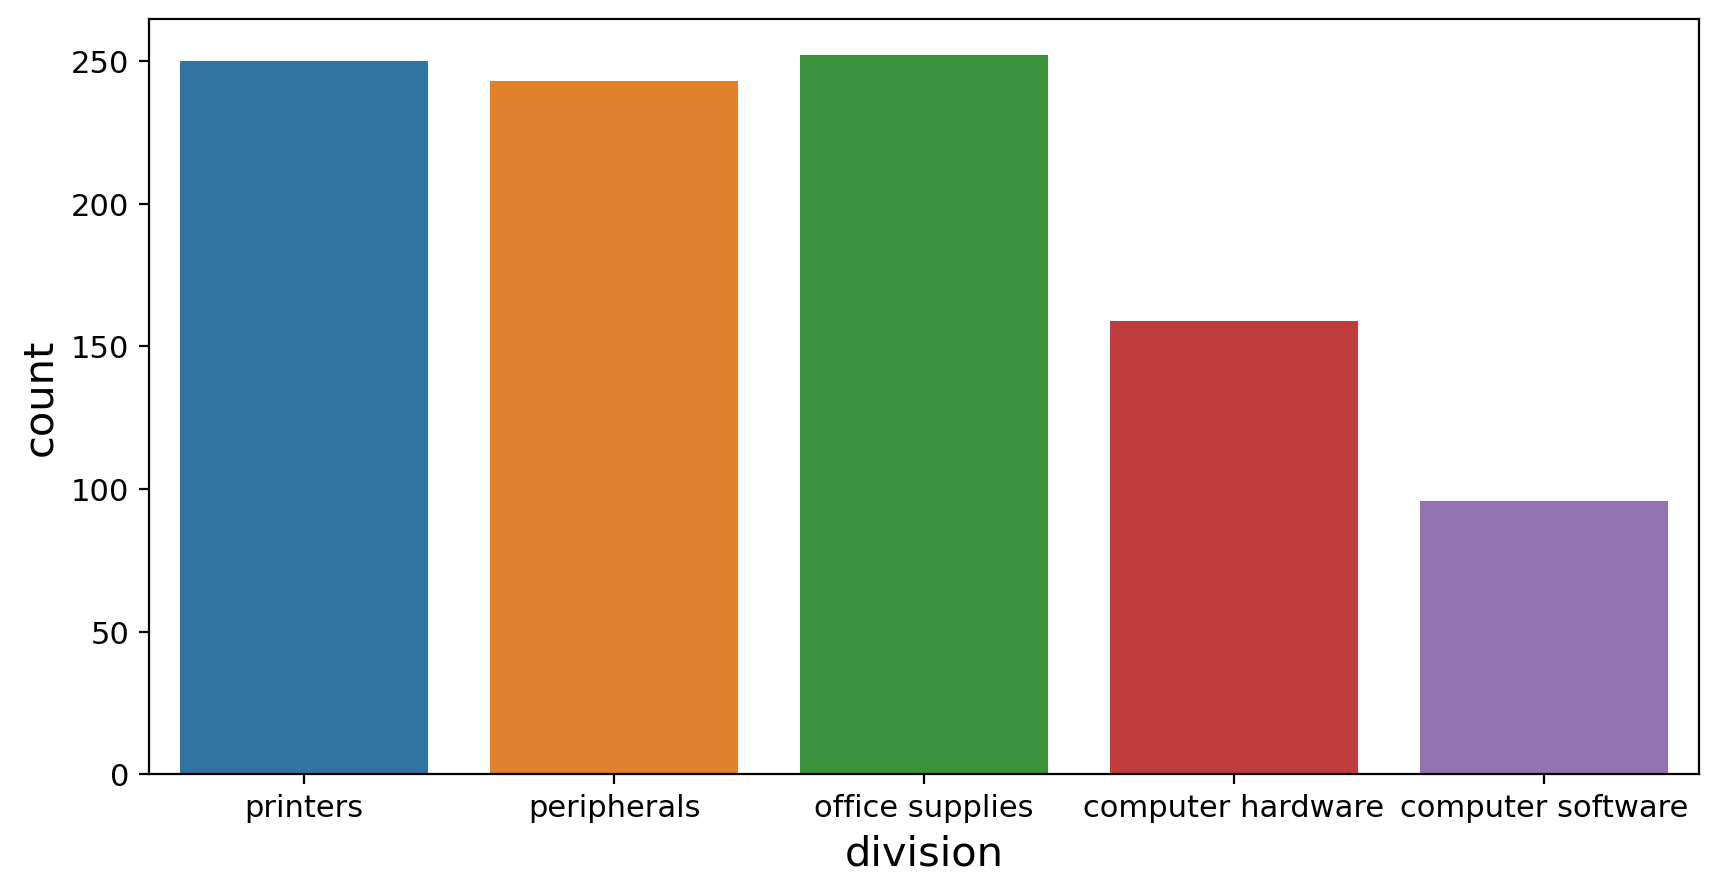

In [22]:
plt.figure(figsize=(10,5), dpi=200)
sns.countplot(data=df, x='division')
# avoid to deceive the people to change y limitation
# plt.ylim(90, 260) # should use the normal display

<AxesSubplot:xlabel='level of education', ylabel='count'>

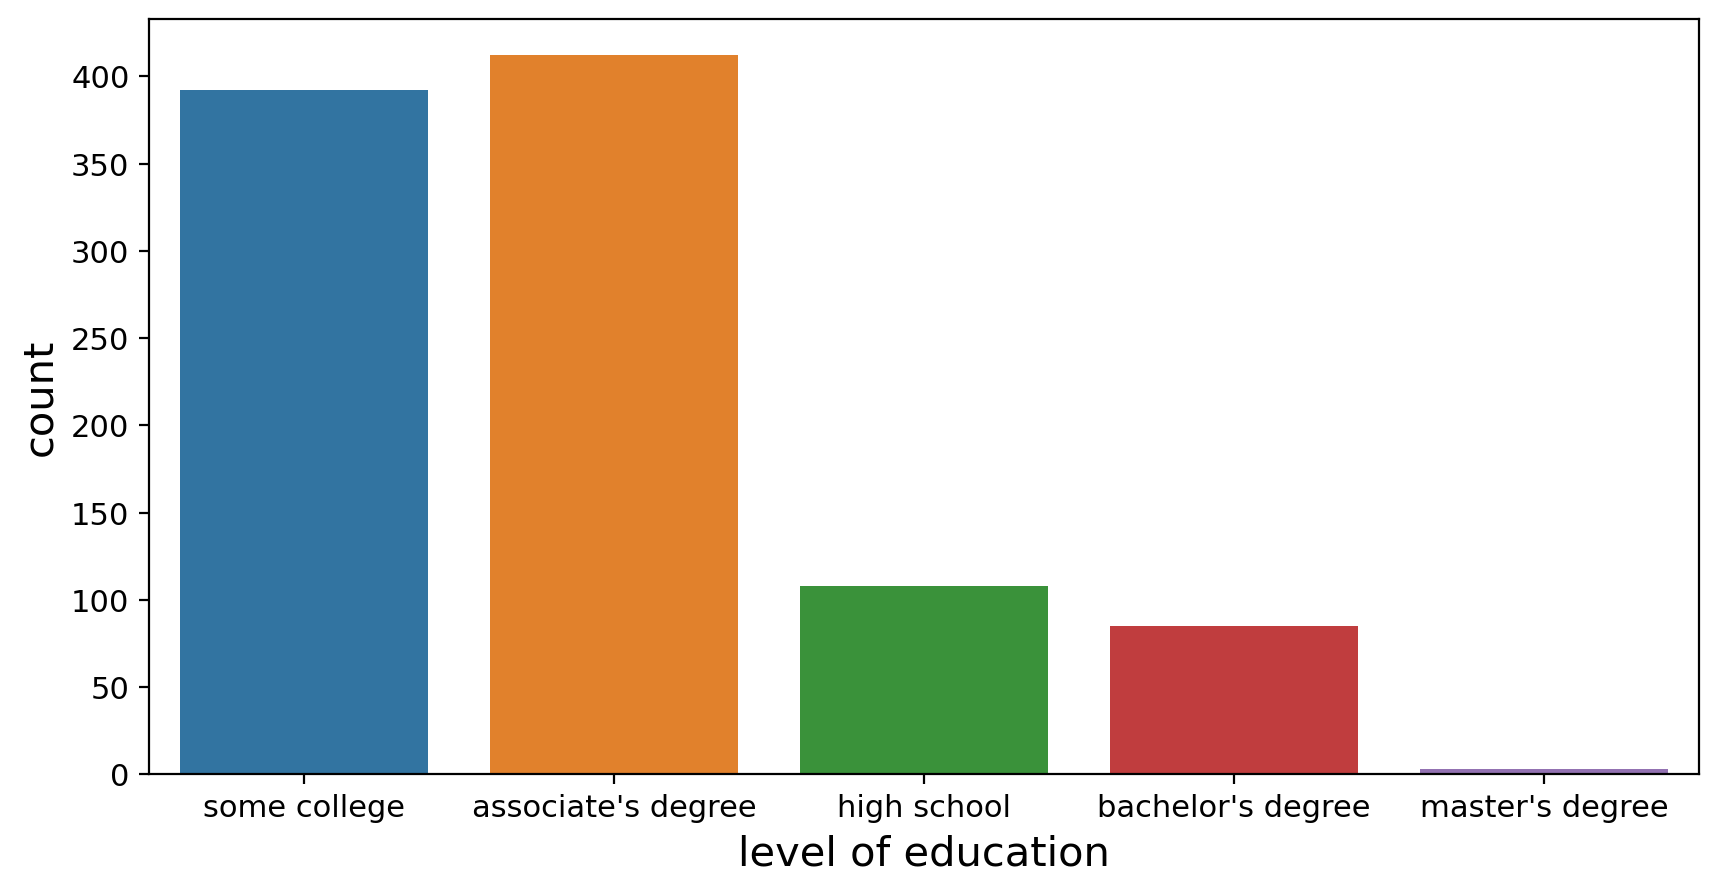

In [23]:
plt.figure(figsize=(10,5), dpi=200)
sns.countplot(data=df, x='level of education')


In [24]:
df['level of education'].value_counts()

associate's degree    412
some college          392
high school           108
bachelor's degree      85
master's degree         3
Name: level of education, dtype: int64

##### Add more one the count in count
* Using the **hue=** to split it up to more categories

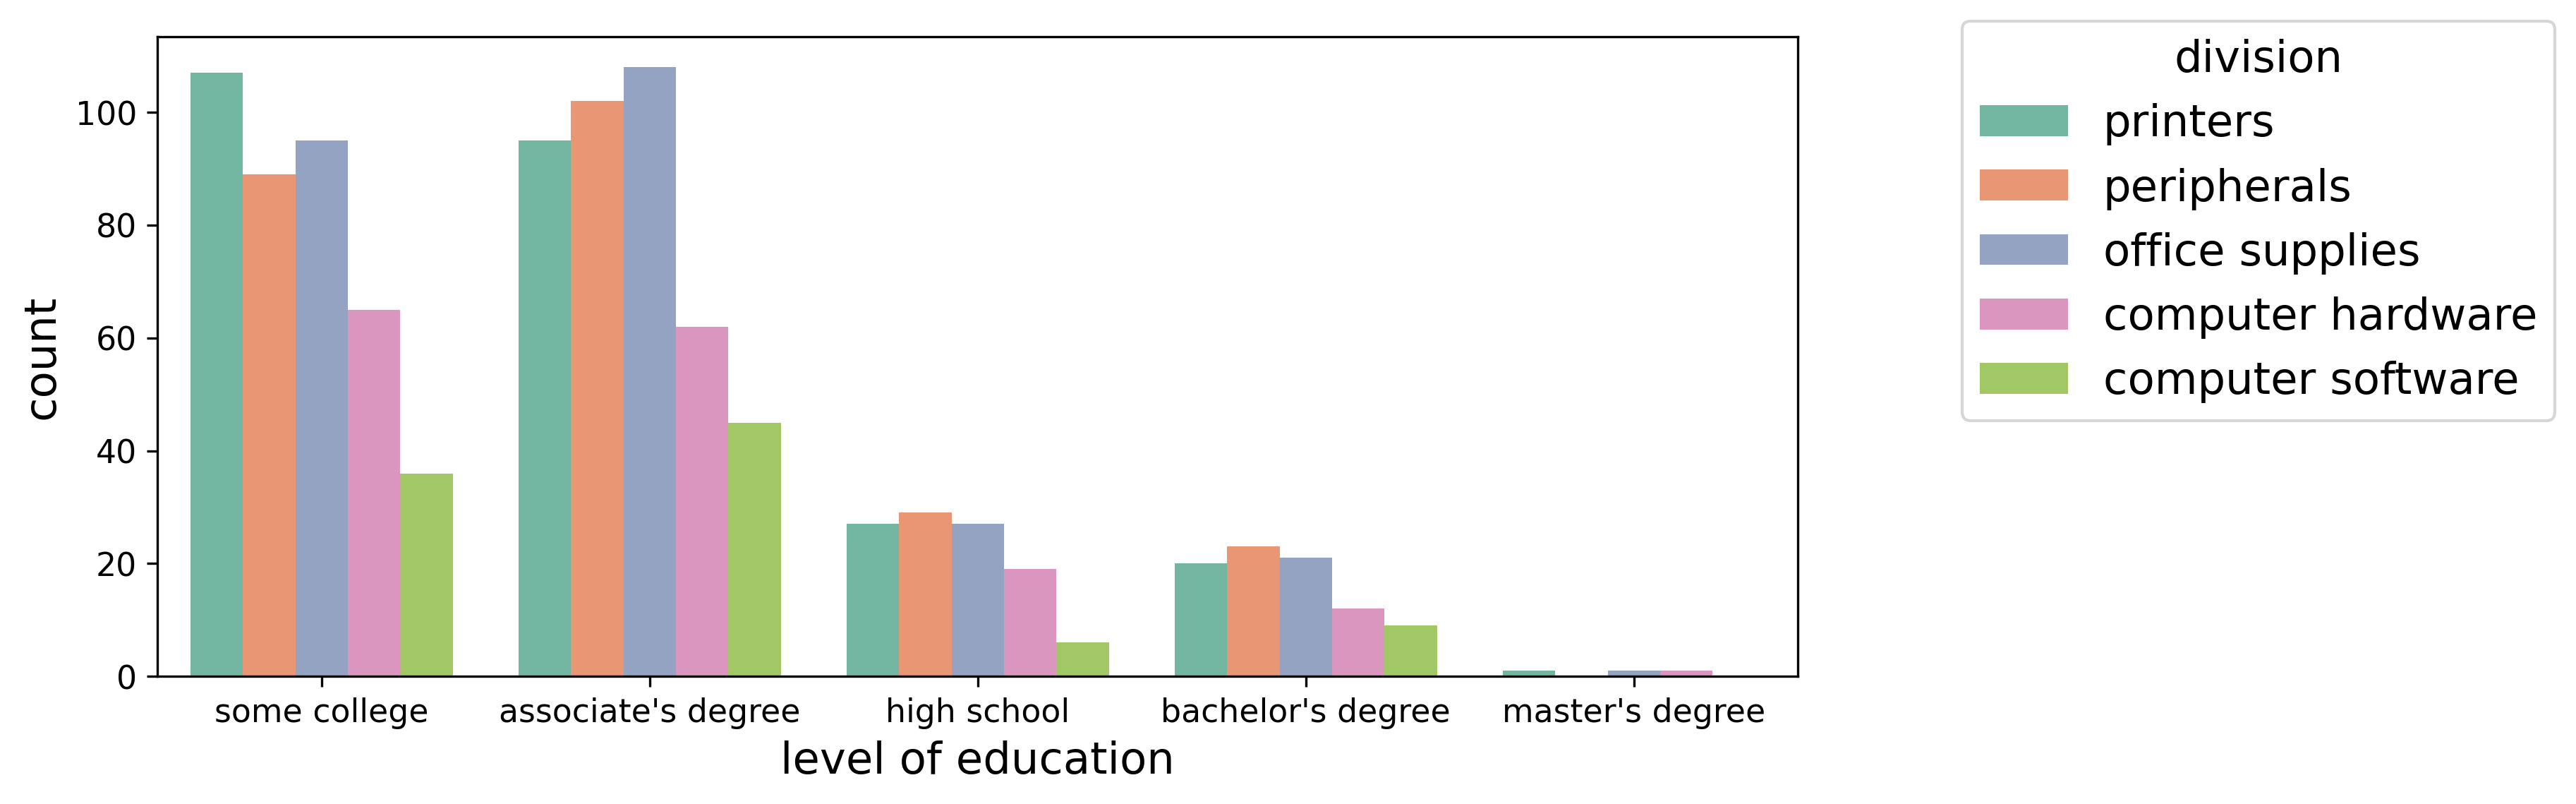

In [25]:
plt.figure(figsize=(10,4), dpi=300)
sns.countplot(data=df, x='level of education', hue="division", palette="Set2")
plt.legend(title="division",loc=(1.1, 0.4))

#### Barplot
* The countplot is the special case of barplot

**Show the average salary and stand deviations per level of education**

<AxesSubplot:xlabel='level of education', ylabel='salary'>

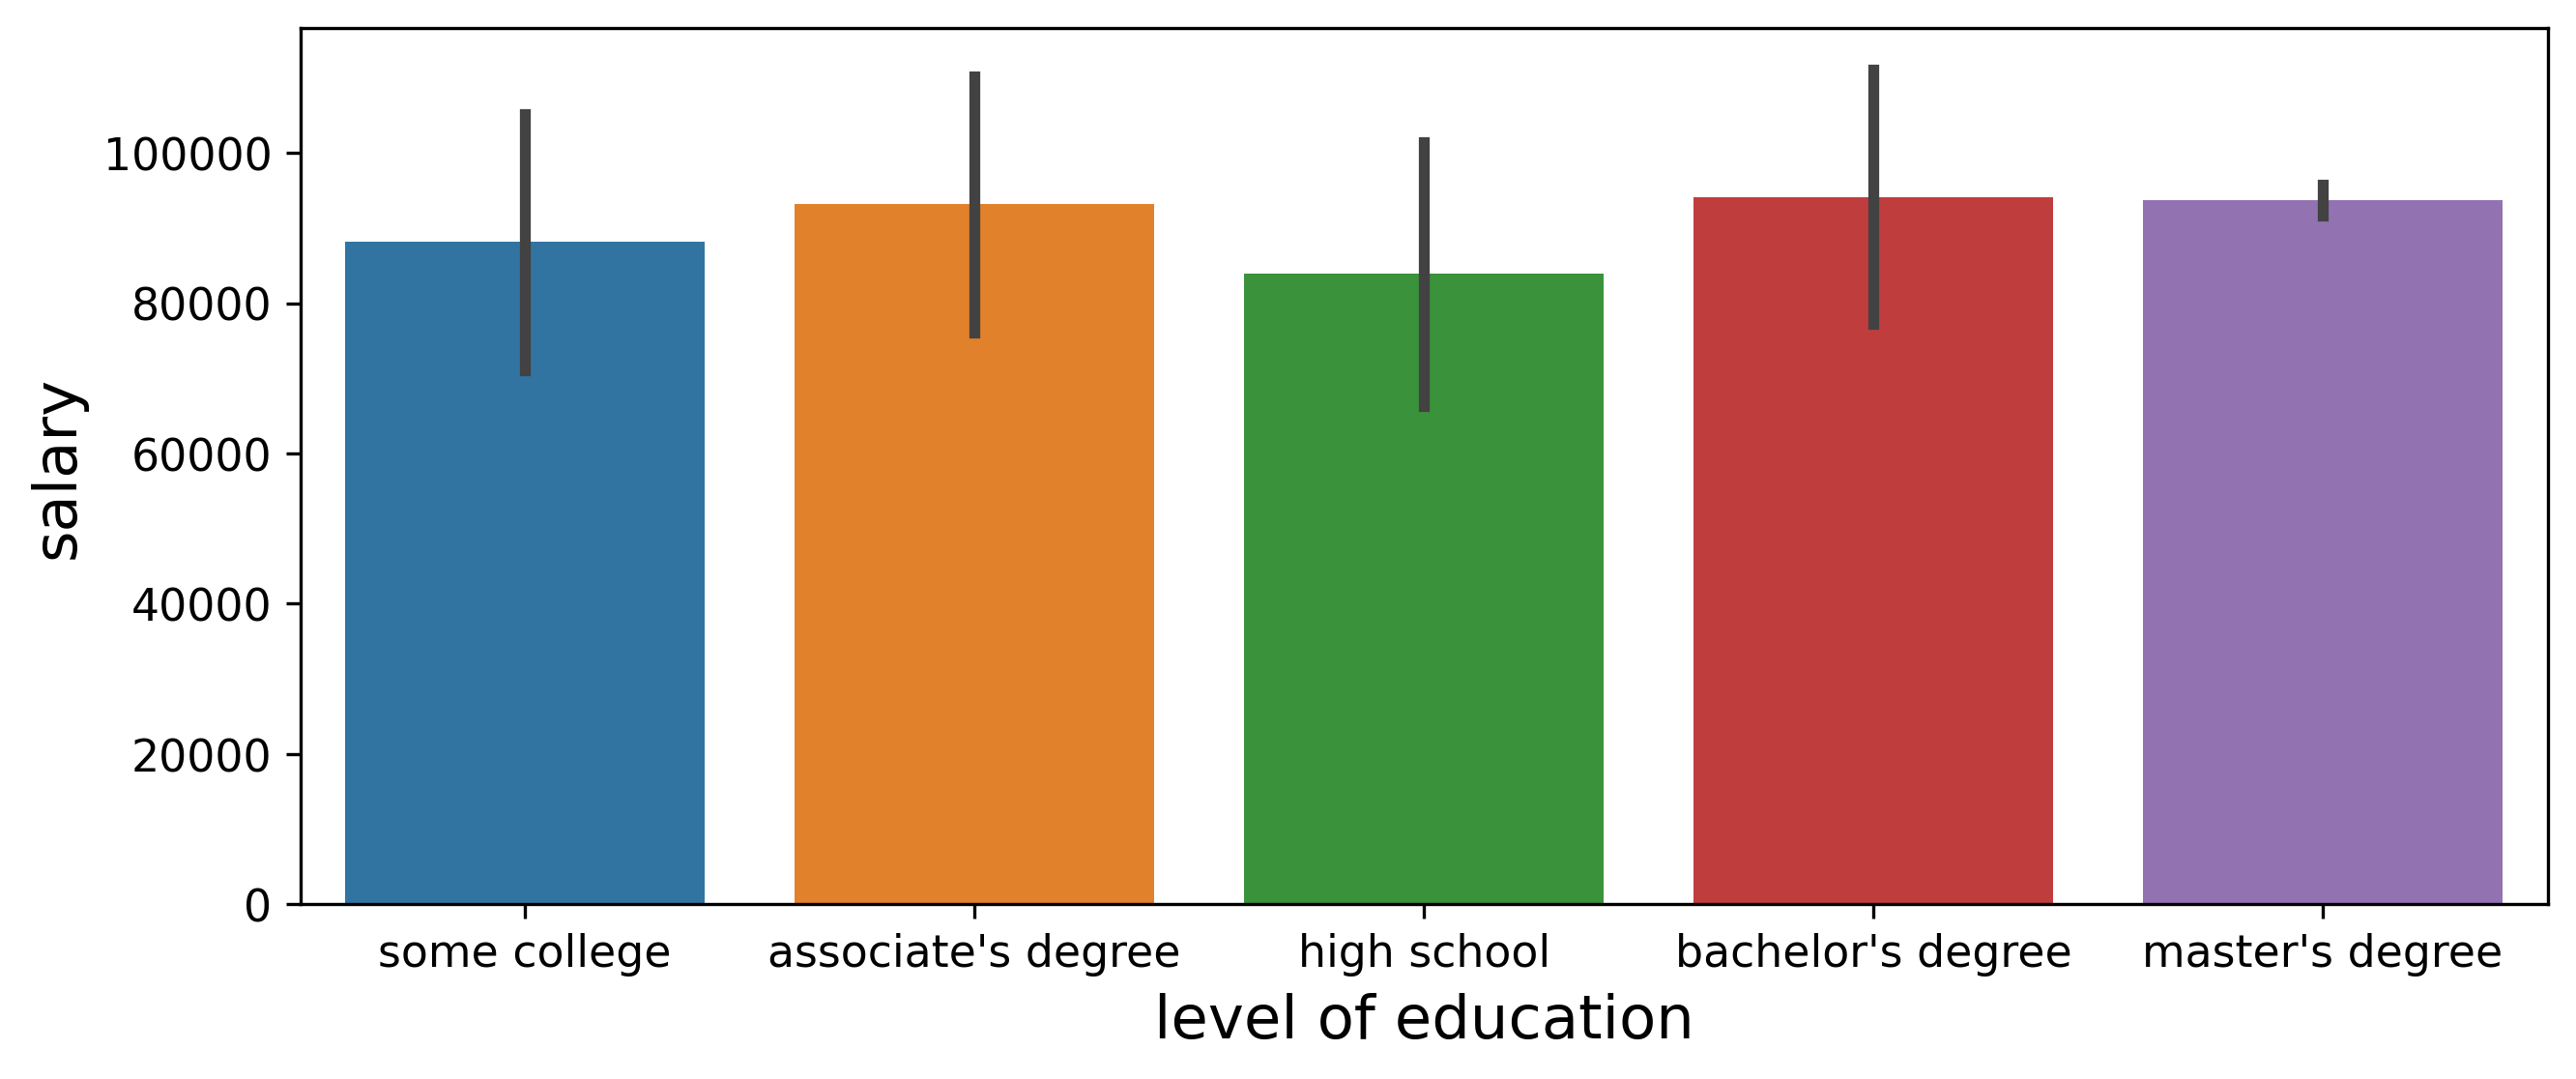

In [26]:
plt.figure(figsize=(10,4), dpi=300)
# level of education as categorical
# salary as the continuous
# use the estimator similar as groupby()
# ci is the confidence intervals
# if ci="sd" skip boostrapping and draw the standard deviation of observation

sns.barplot(data=df, x="level of education", y="salary", estimator=np.mean, ci="sd")

**Show the average salary and stand deviations per level of education per division**
* Using the **hue=** to split it up to more categories

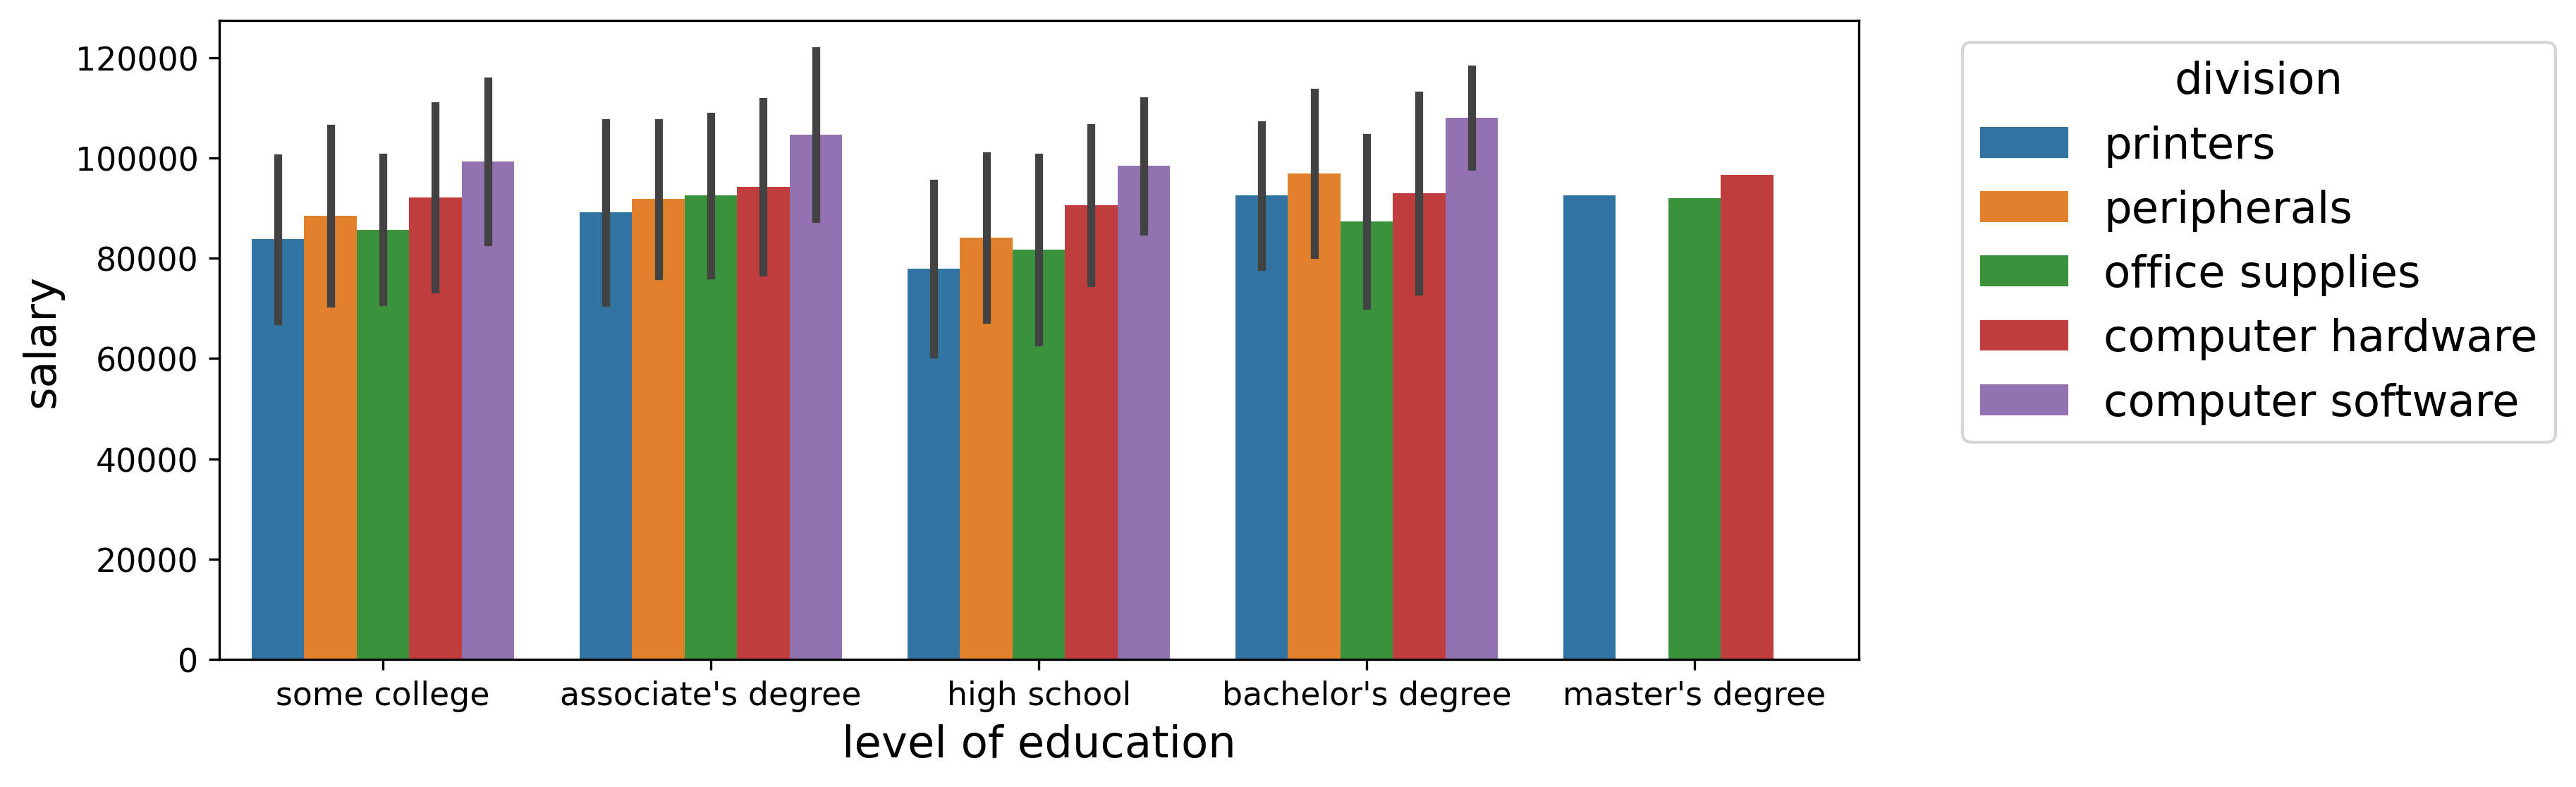

In [27]:
plt.figure(figsize=(10,4), dpi=300)
sns.barplot(data=df, x="level of education", y="salary", estimator=np.mean, ci="sd", hue='division')
plt.legend(title="division",bbox_to_anchor=(1.05, 1))

## Distribution within Categories
### Understanding plot types
* We have explored distribution plots for a single feature, but what if we want to compare distribution of everyone's salary, we can compare the distributions of salaries **per** level of education
* We will first separate out each category, then create the distribution visualization
* Distribution within Categories
    * Boxplot
    * Violinplot
    * Swarmplot
    * Boxenplot (Letter-Value Plot)
***
#### The Box plot (the most popular plot in distribution within categories)
* The boxplot displays the distribution of a continuous variable
* It does through the use of quartiles
* **Quartiles** separate out the data into 4 equal number of data points (Q1, Q2, Q3, Q4):
    * 25% of data points are in bottom quartile
    * 50th percentile (Q2) is the median
* Median splits data in half - 50th percentile
* The actual box is called as the **Interquartile Range** - IQR
* The IQR defines the **box width** - the middle 50 percent of all the data points
* The 50 percent of all data points are inside the box - falls between Q1 and Q4
* Q1 is the 25th percentile - 25% of all points are below Q1
* Q3 is the 25th percentile - 25% of all points are above Q3
* The "whiskers" are defined by 1.5 x IQR
* The **outliers** is point outside the 1.5 x IQR
* Boxplot quickly gives statistical distribution information in a visual format
* Boxplot can be oriented **vertically** or **horizontally**
* We can create a box plot **per** category
***
#### Violinplot
* The violin plot plays a similar role as the box plot
* It displays the probability density across the data using a KDE
* We can imagine it as a mirrored KDE plot
* We take the KDE of a single feature then **mirror** it to get the **violin plot**
* The median is the **black line** in the middle
****
#### Swarm plot and boxen plot
* less common categorical distribution plots
##### Swarm plot
* The swarm plot is very simple and simply shows all the data points in the distribution
* **For every large data sets**, it won't show all the points, but will display the general distribution of them
* It is not the mirror image - it just one dot per data point
* If you have lots of datapoint - change the size of points to how more
##### Boxenplot
* The boxenplot (Letter-value plot) is a relatively new plot developed in 2011 by Heike Hofmann, Karen Kafadar
* Its mainly designed as an expansion upon the normal plot
* Make sure to read the linked paper in the notebook if you end up using this plot!
* **Note** that the boxenplot is currently very uncommon
* Only use this plot type if you know audience is familiar with it
* Using a system of letter-values we can use multiple quantiles instead of strictly quartiles
* Boxenplot showing letter-value quantiles to display against a standard boxplot

# Keep in mind the main purpose of data visualizations is to inform, not confuse or show-off various esoteric plots!

#### Import environment

In [28]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### Change the background

In [29]:
mpl.rcParams.update({"font.size": 11,
                     "figure.facecolor": "white",
                     "xtick.labelsize": 12,
                     "ytick.labelsize": 12,
                     "axes.titlesize": 14})

In [30]:
df = pd.read_csv(filepath_or_buffer=r"C:\Users\admin\Desktop\Data Science\Course-2021\05-Seaborn\StudentsPerformance.csv")


In [31]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

#### Boxplot

<AxesSubplot:ylabel='math score'>

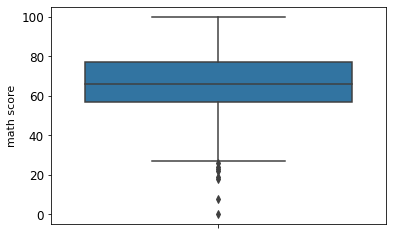

In [32]:
# Only get the distribution for all of the math score
sns.boxplot(data=df, y="math score")

<AxesSubplot:xlabel='test preparation course', ylabel='math score'>

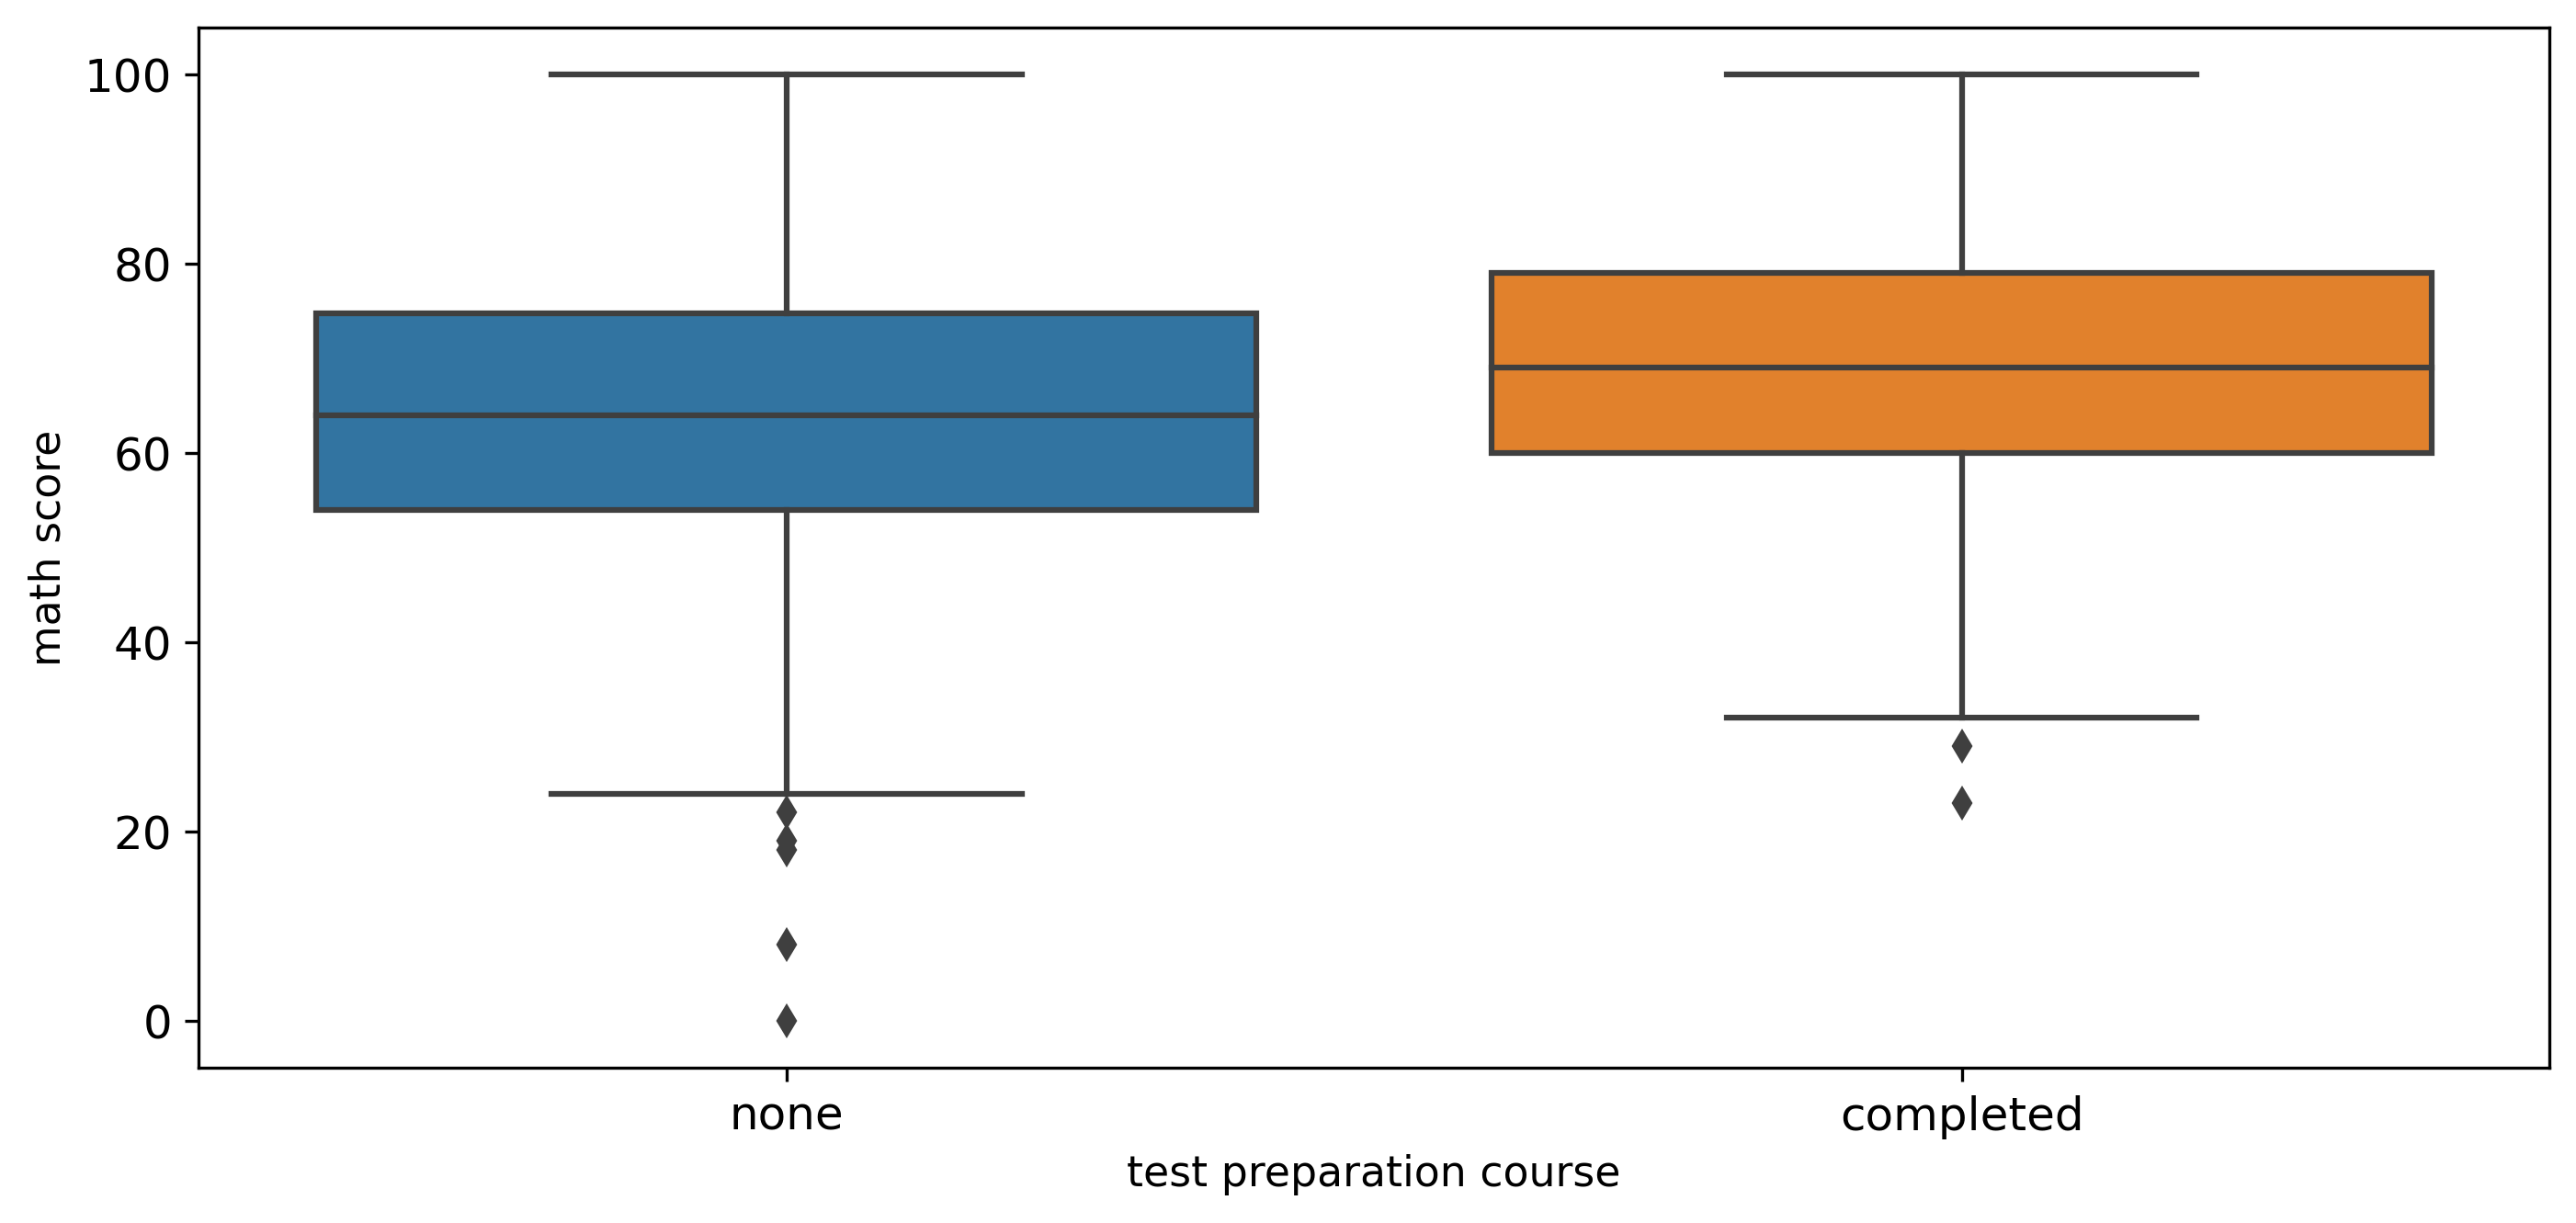

In [33]:
# Separate by category
# Separate by the test preparation course category
# From the boxplot => the student make the test preparation course has the math score higher than other people
plt.figure(figsize=(11,5), dpi=300)
sns.boxplot(data=df, y="math score", x="test preparation course")

<AxesSubplot:xlabel='test preparation course', ylabel='reading score'>

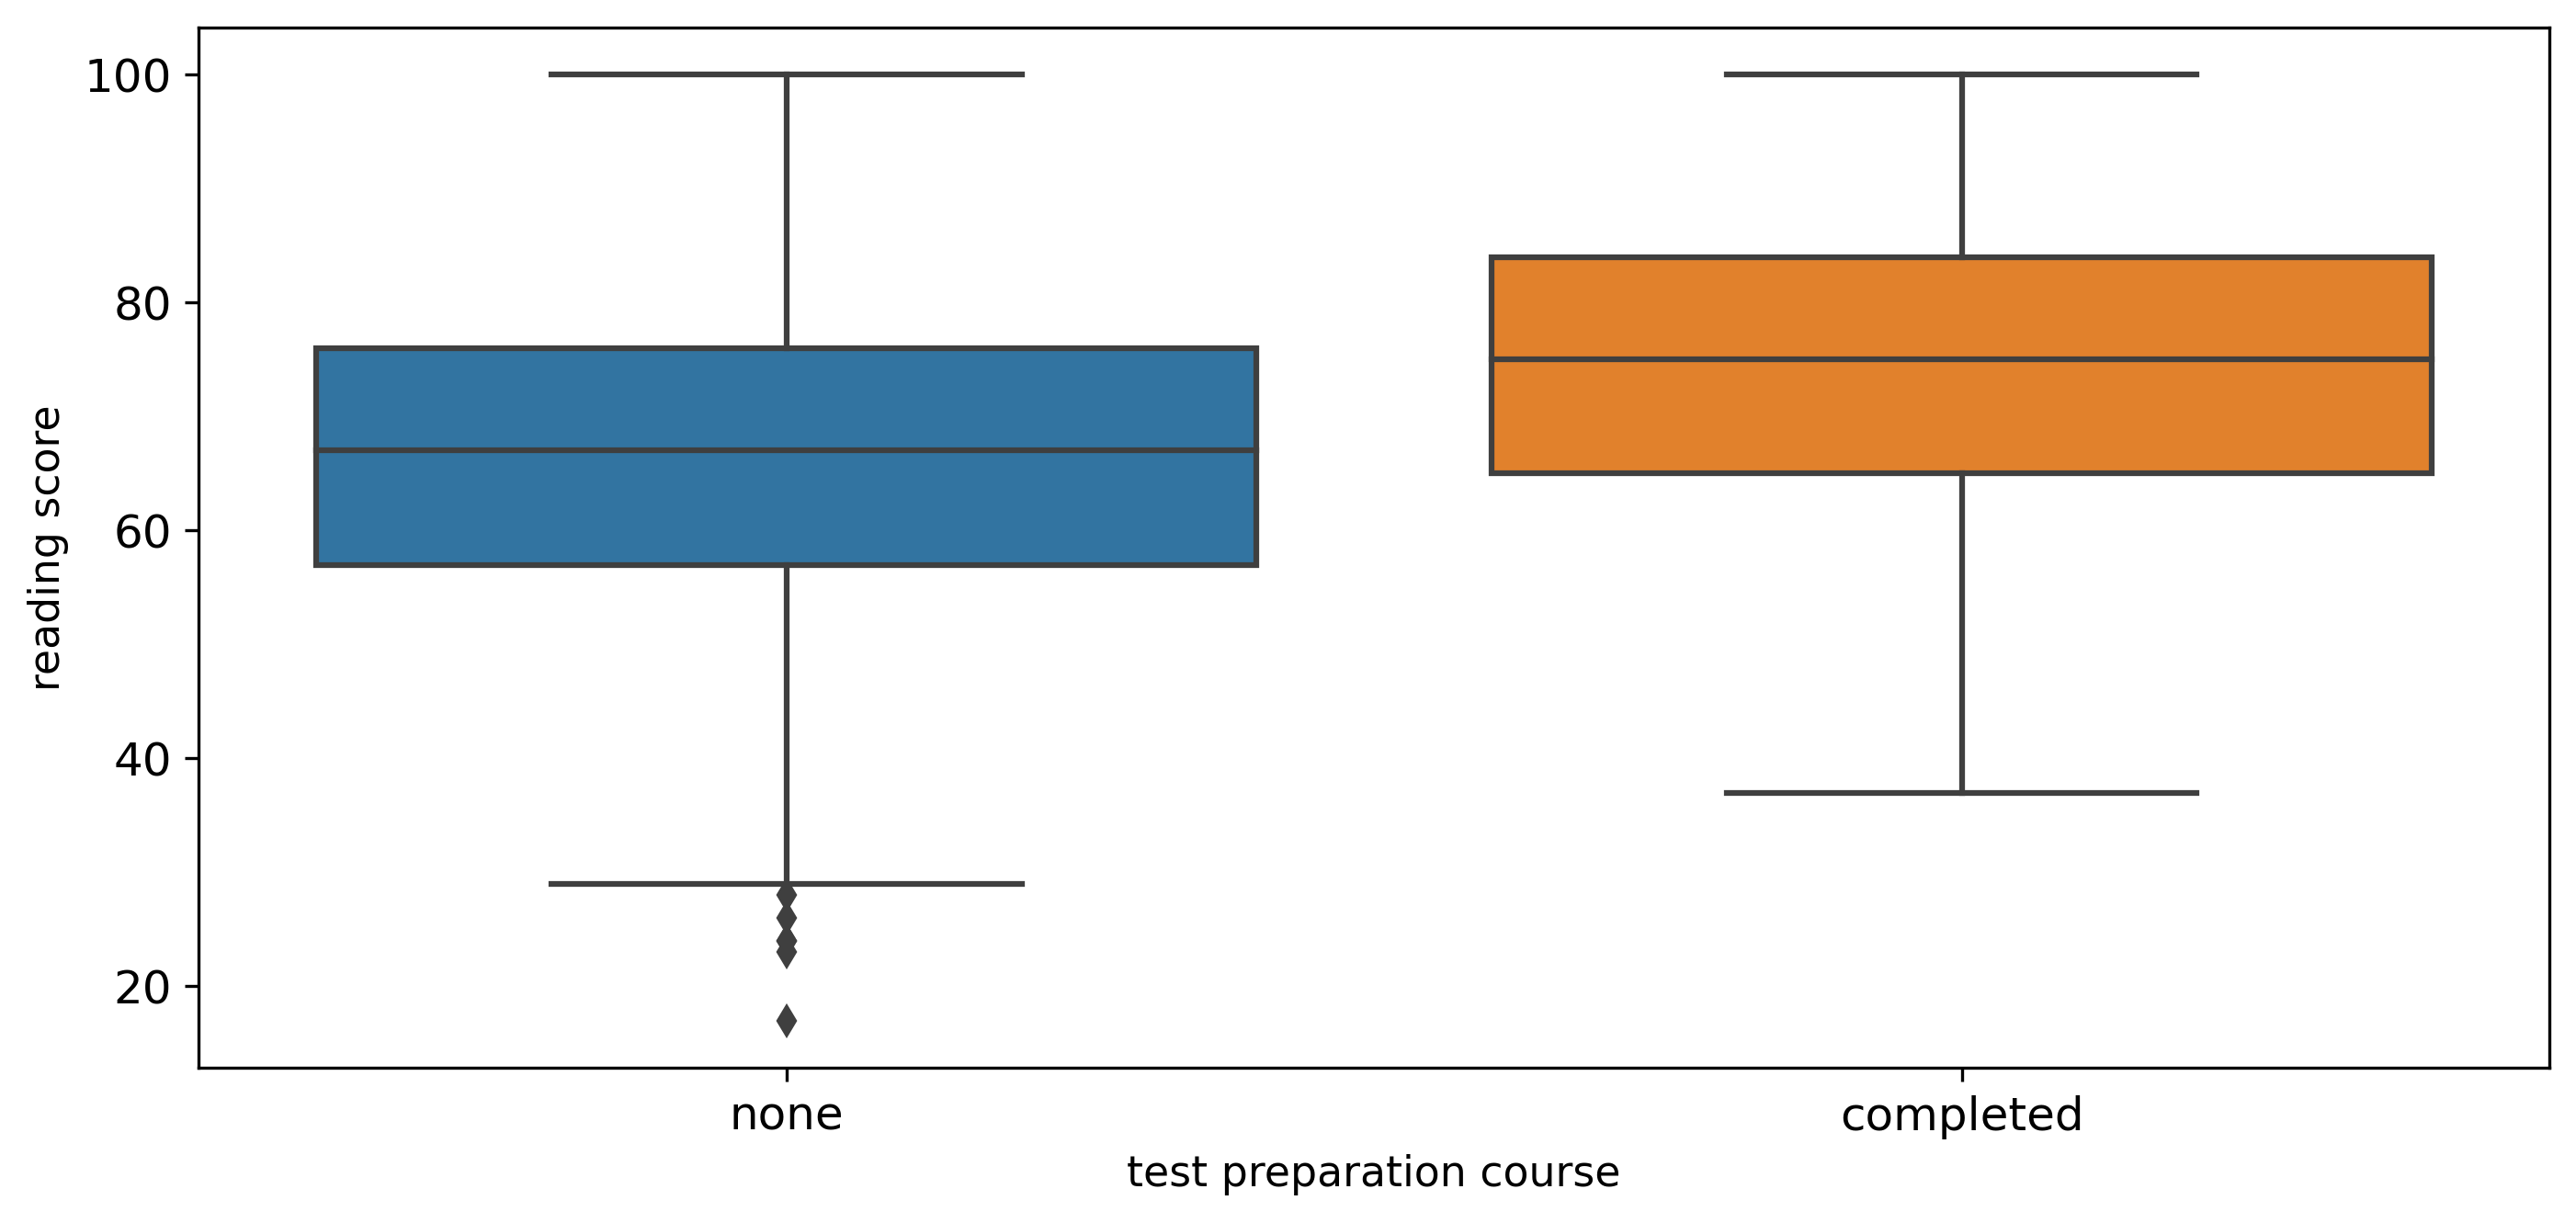

In [34]:
plt.figure(figsize=(11,5), dpi=300)
sns.boxplot(data=df, y="reading score", x="test preparation course")

<AxesSubplot:xlabel='parental level of education', ylabel='reading score'>

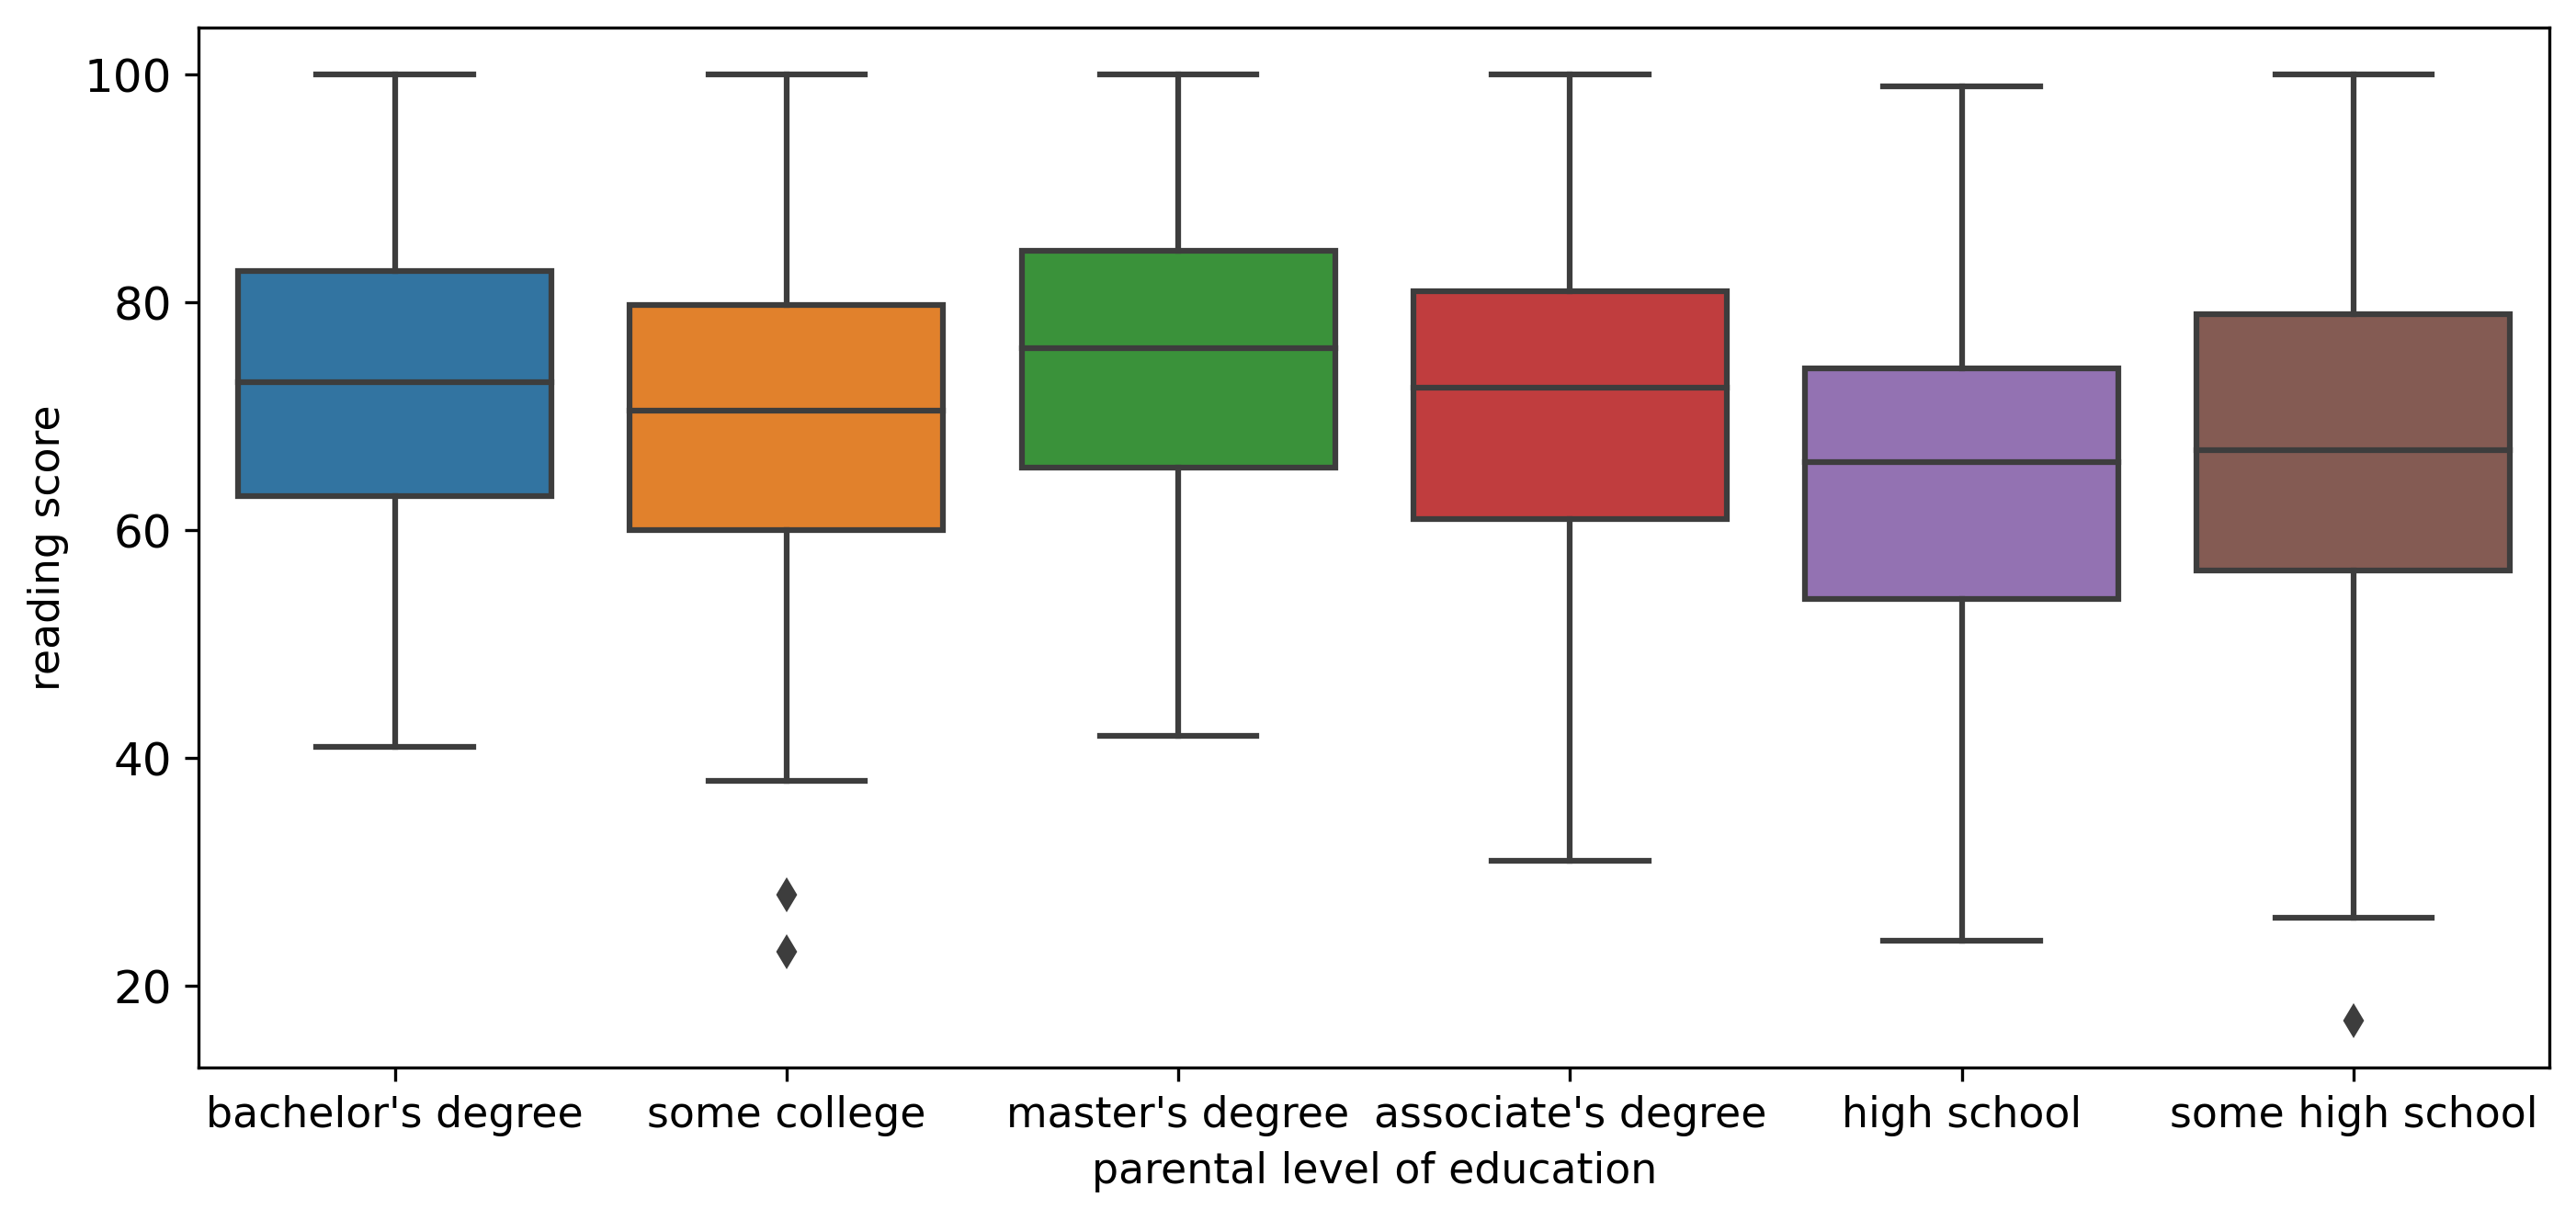

In [35]:
# Separate by the parental level of education
plt.figure(figsize=(11,5), dpi=300)
plt.xticks(fontsize=11)
sns.boxplot(data=df, y="reading score", x="parental level of education")

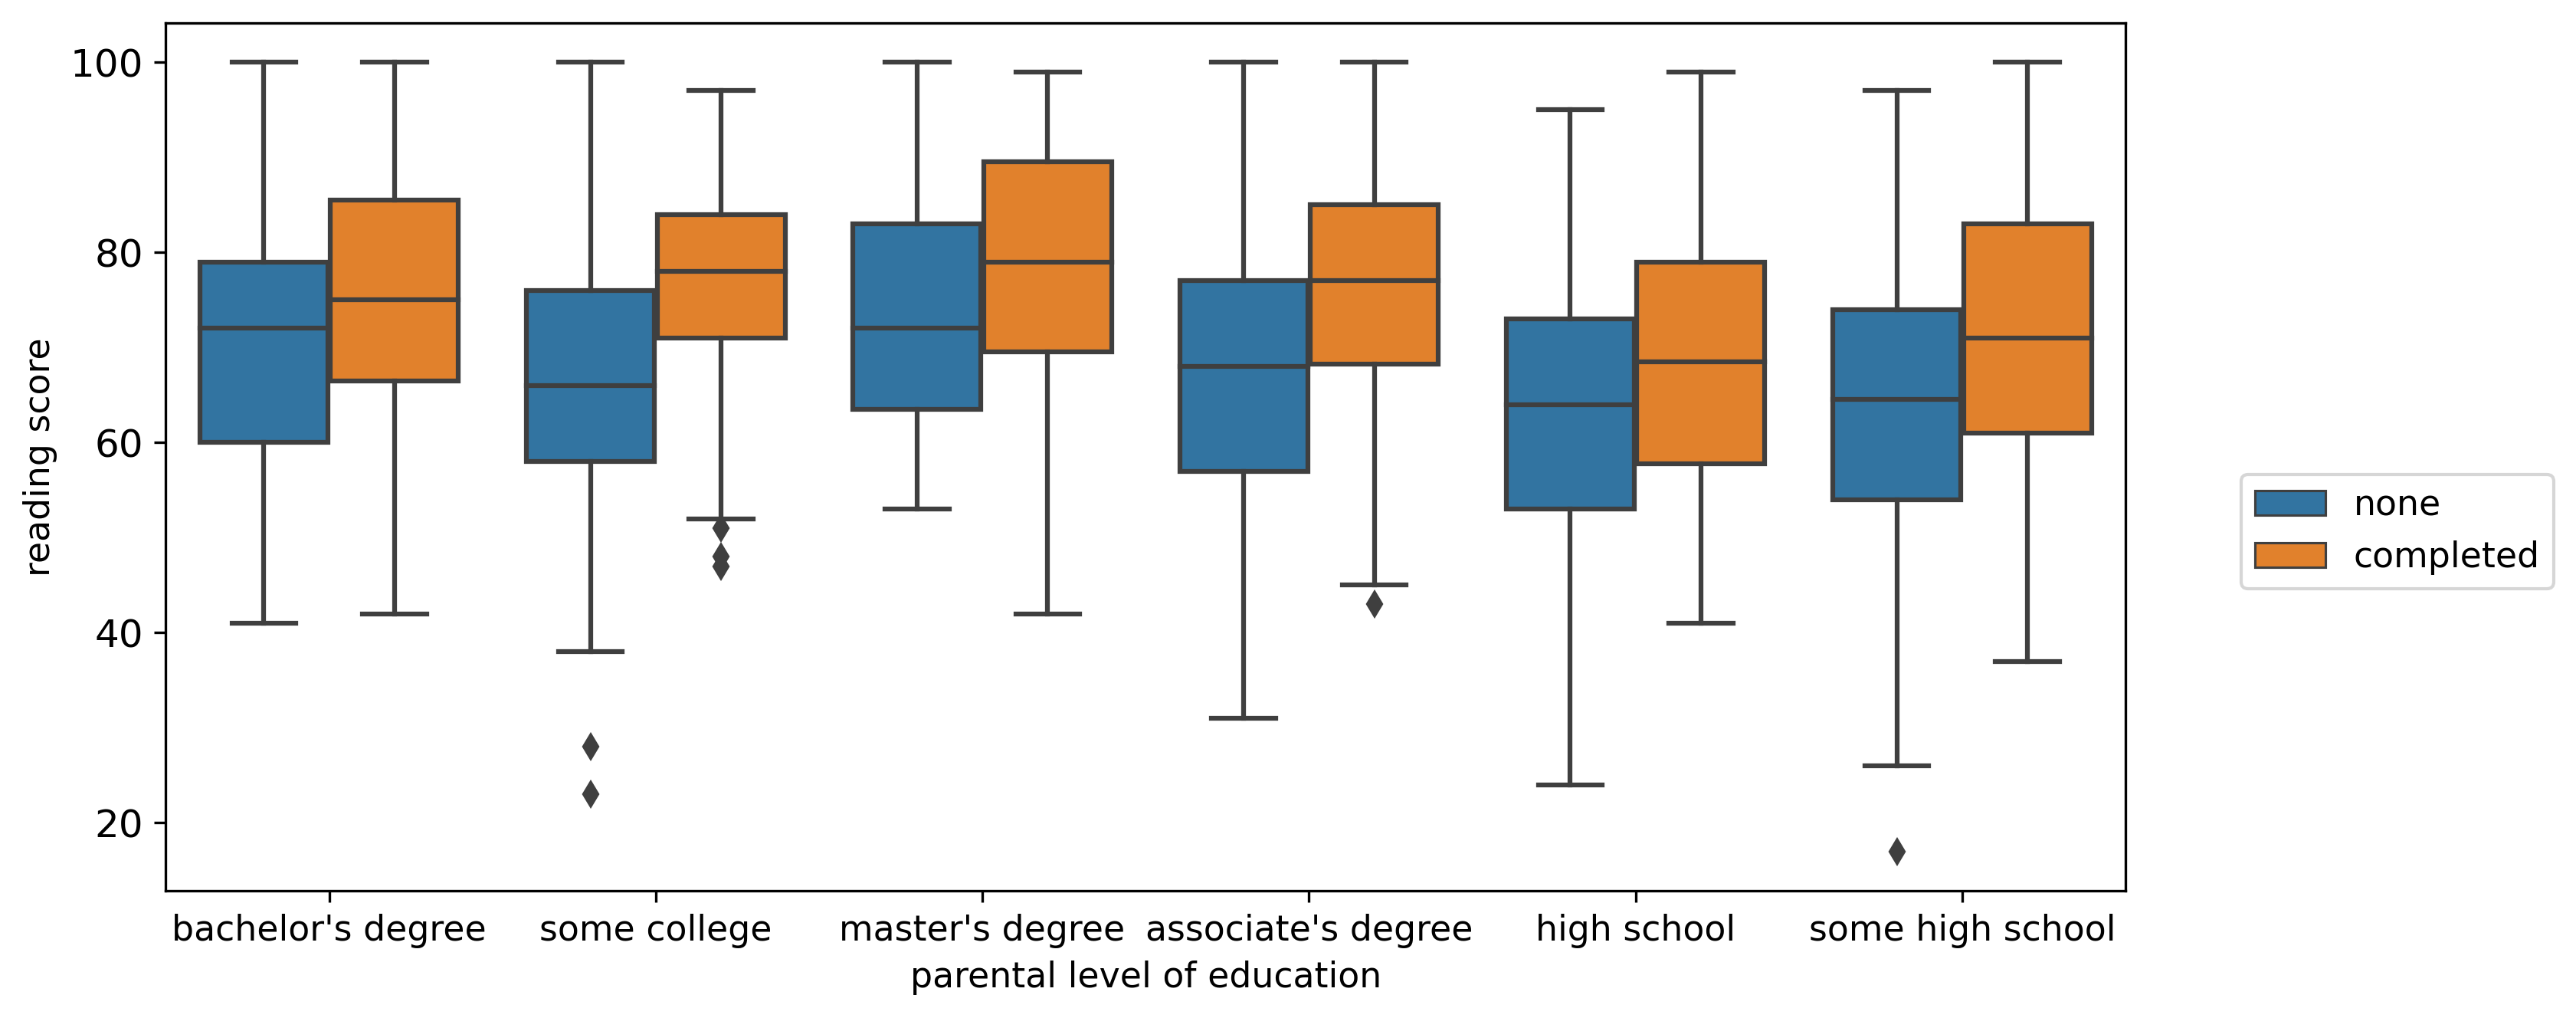

In [37]:
# Create the subcategory
# Using the hue similar with other plot types
plt.figure(figsize=(11,5), dpi=300)
plt.xticks(fontsize=11)
sns.boxplot(data=df, y="reading score", x="parental level of education", hue="test preparation course")

# moving the legend
plt.legend(bbox_to_anchor=(1.05, 0.5))

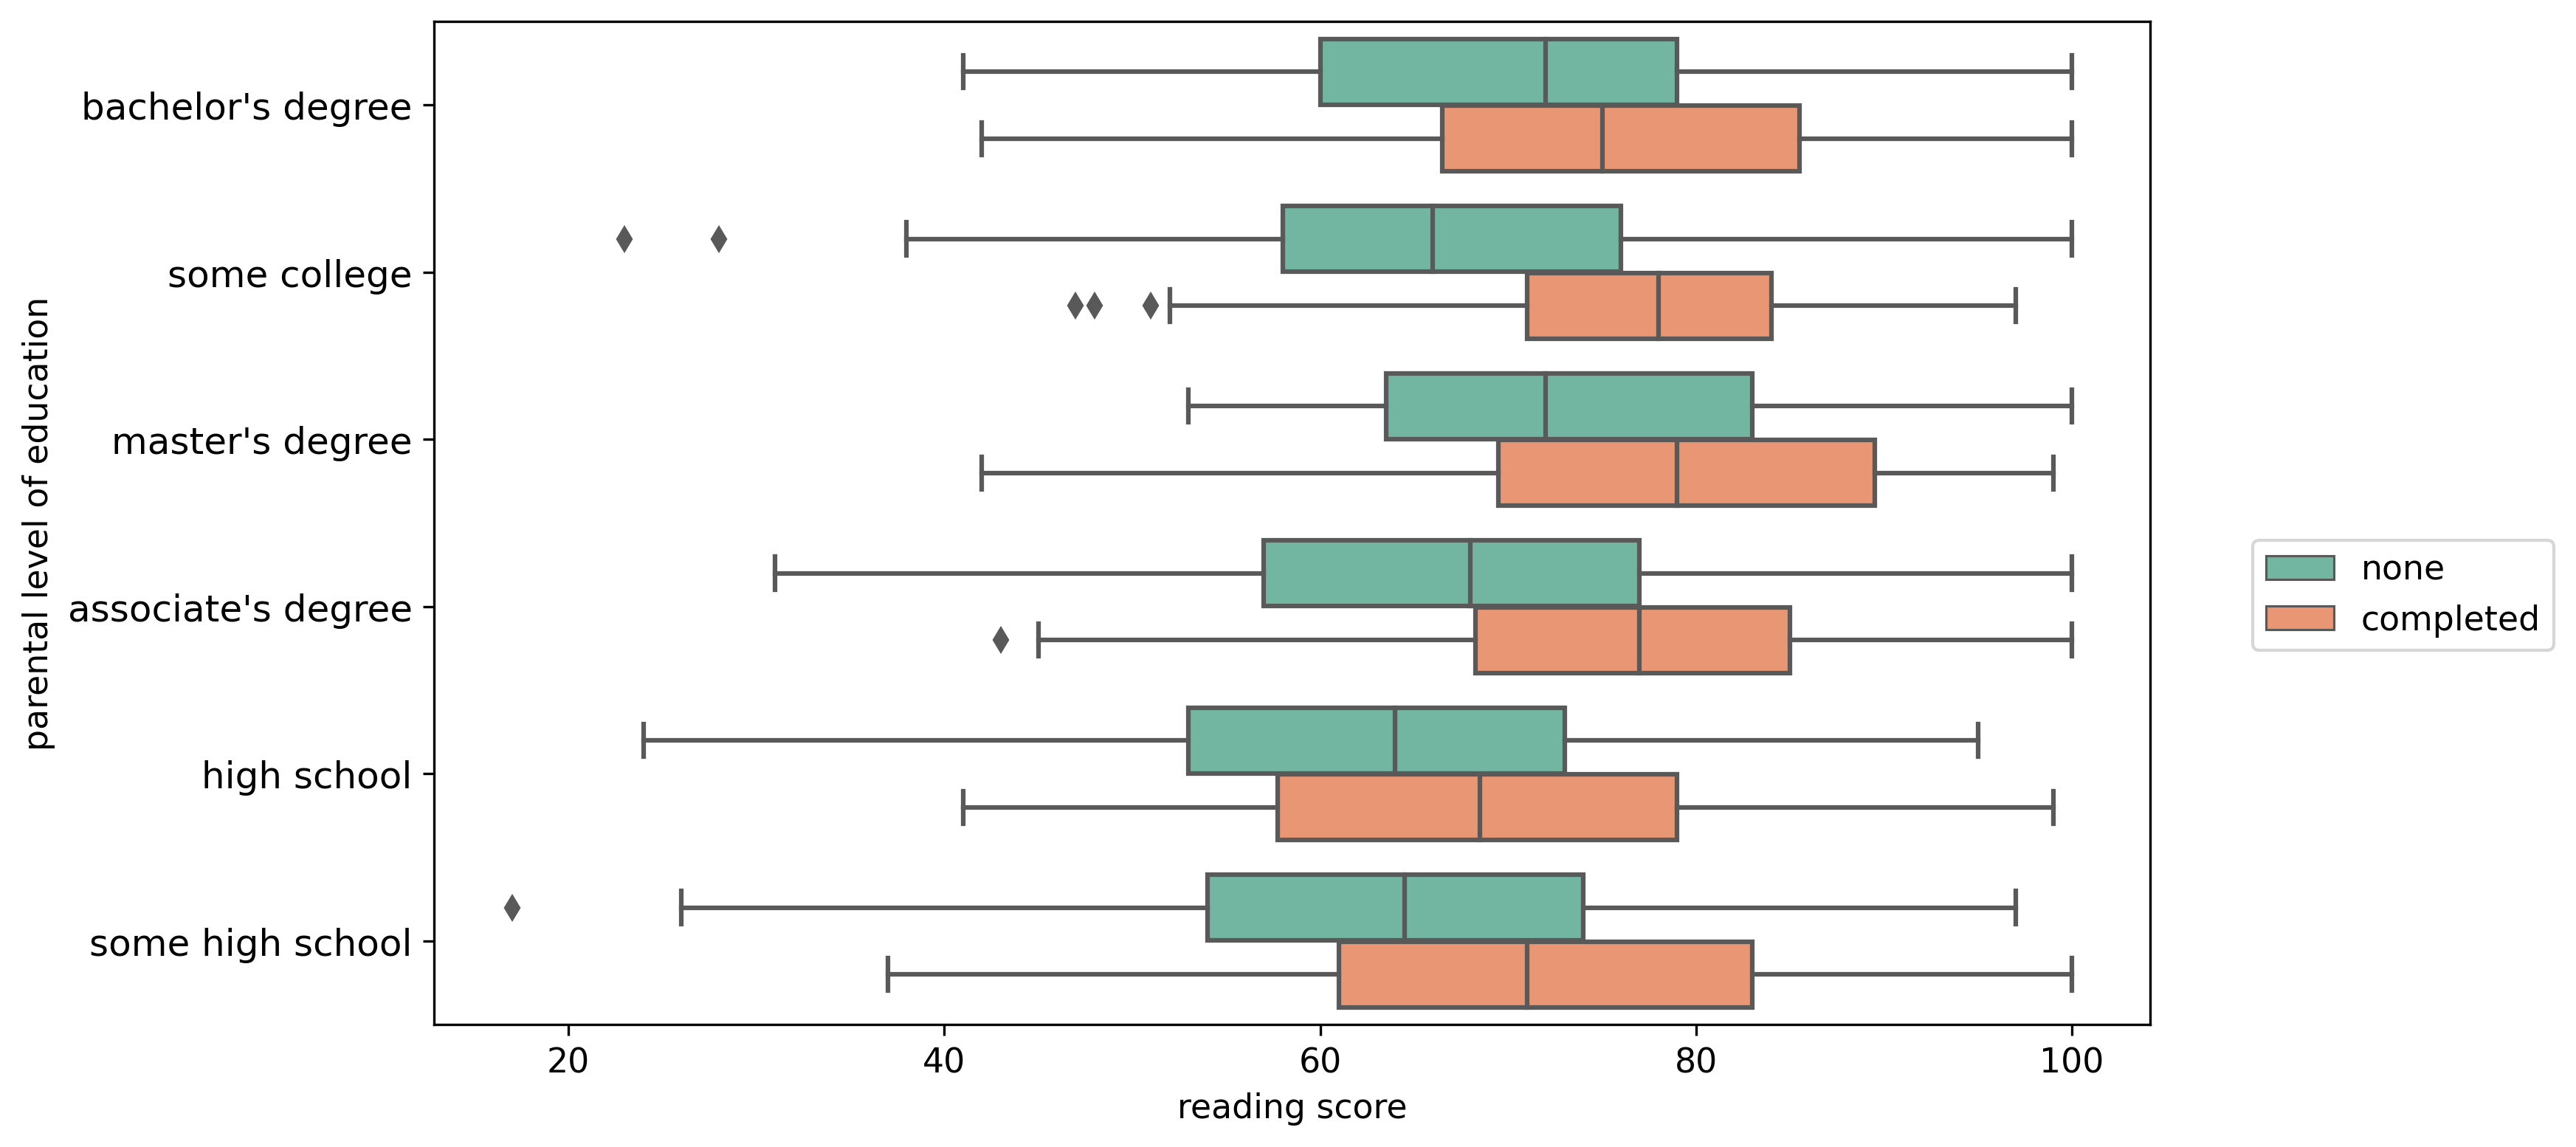

In [42]:
# horizontal rotation of the distribution
# swap the x and y
# x become the continuous variable, y become the categorical variable
plt.figure(figsize=(10,6), dpi=300)
plt.xticks(fontsize=11)
sns.boxplot(data=df, x="reading score", y="parental level of education", hue="test preparation course", palette= "Set2")

# moving the legend
plt.legend(bbox_to_anchor=(1.05, 0.5))

#### Violin plot

<AxesSubplot:xlabel='reading score', ylabel='parental level of education'>

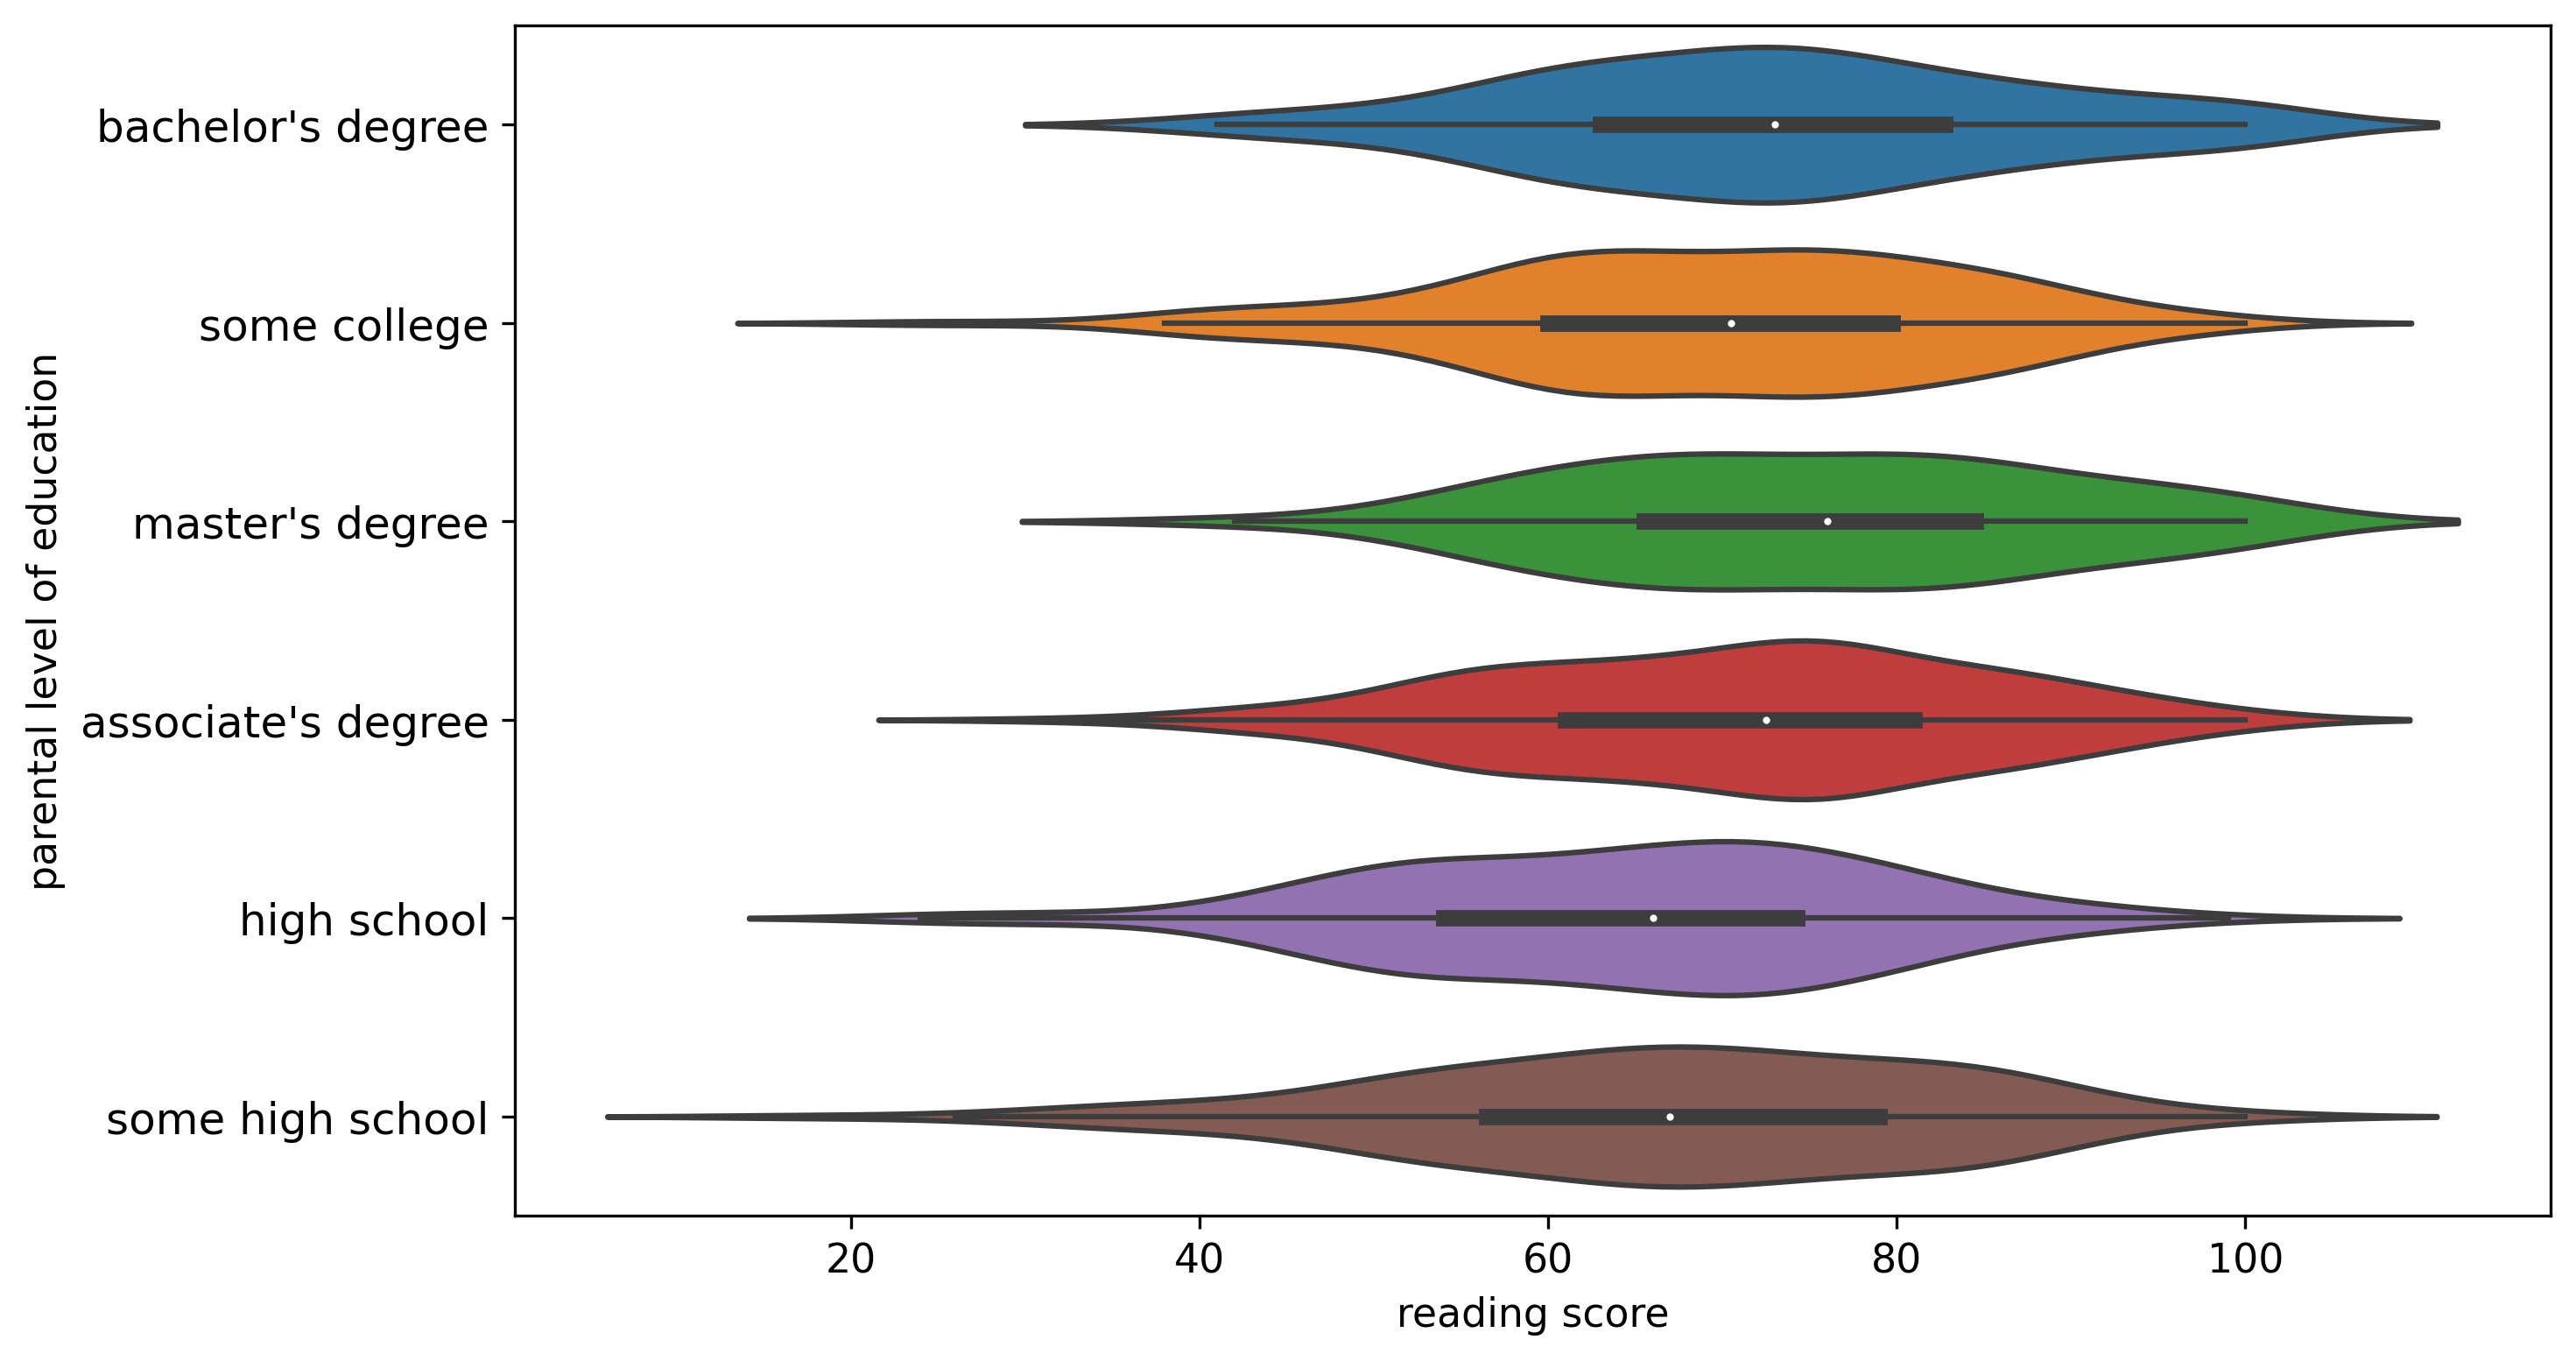

In [44]:
# Separate by the parental level of education category
plt.figure(figsize=(10,6), dpi=300)
plt.xticks(fontsize=11)
sns.violinplot(data=df, x="reading score", y="parental level of education")

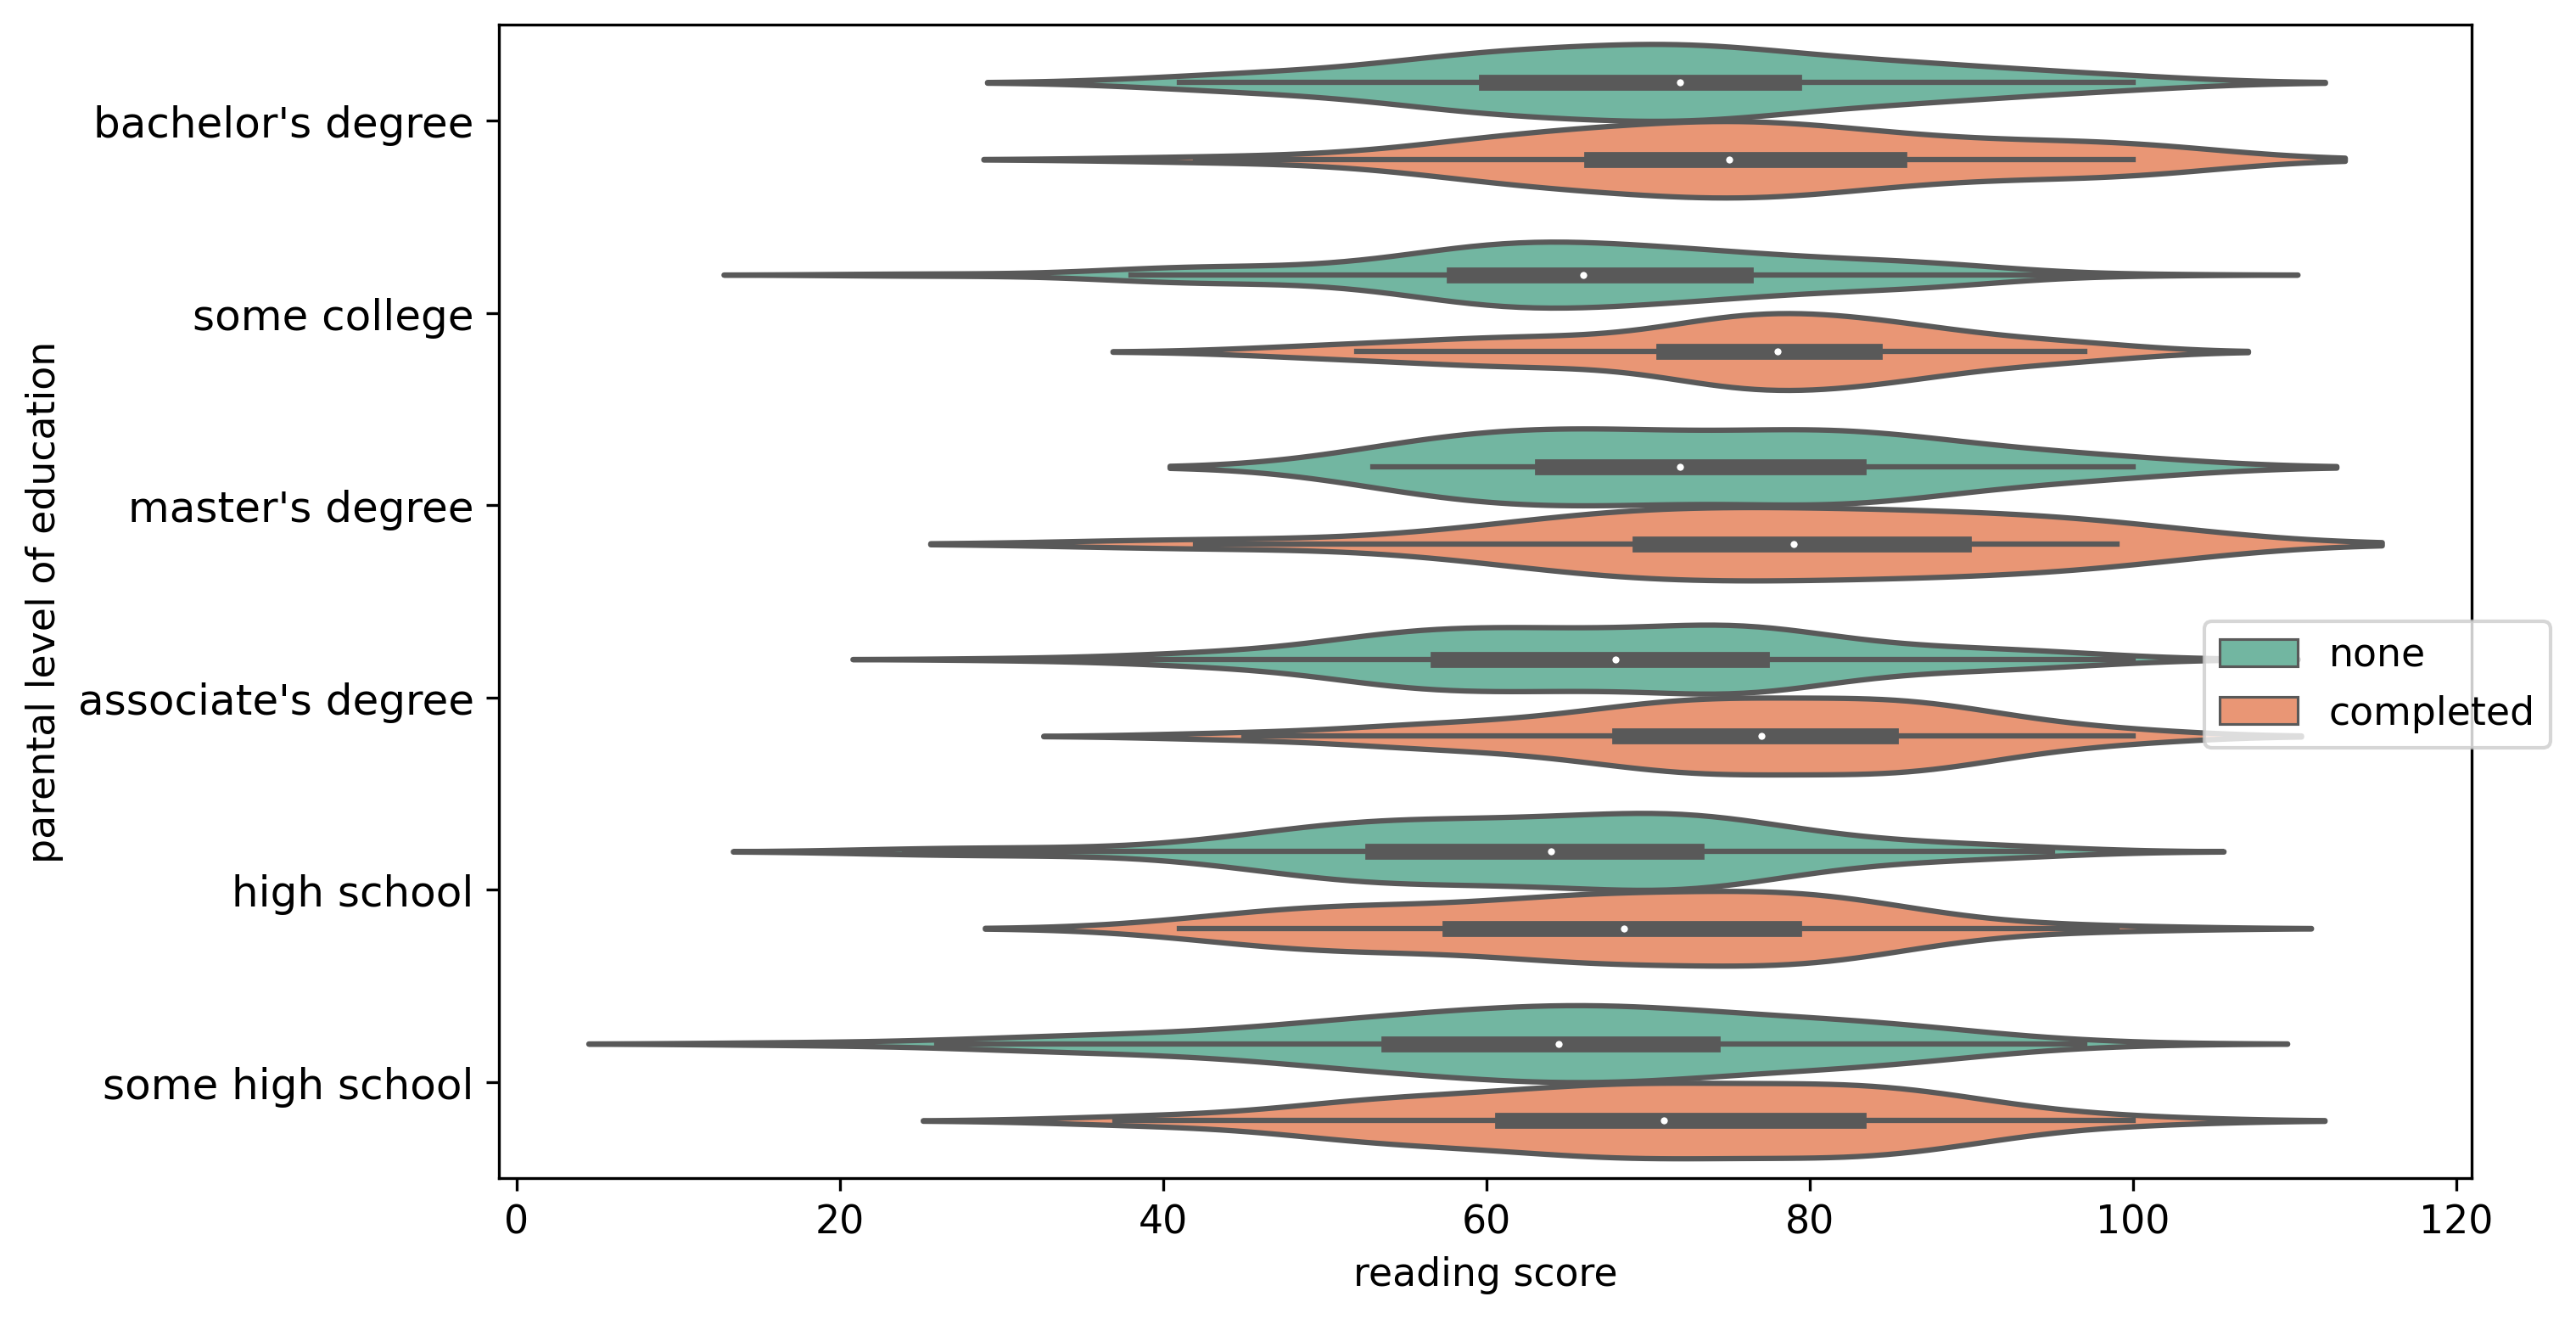

In [46]:
# Separate by the parental level of education category and test preparation course subcategory
plt.figure(figsize=(10,6), dpi=300)
plt.xticks(fontsize=11)
sns.violinplot(data=df, x="reading score", y="parental level of education",
               hue="test preparation course", palette= "Set2")

# moving the legend
plt.legend(bbox_to_anchor=(1.05, 0.5))

##### This kind of split not recommend

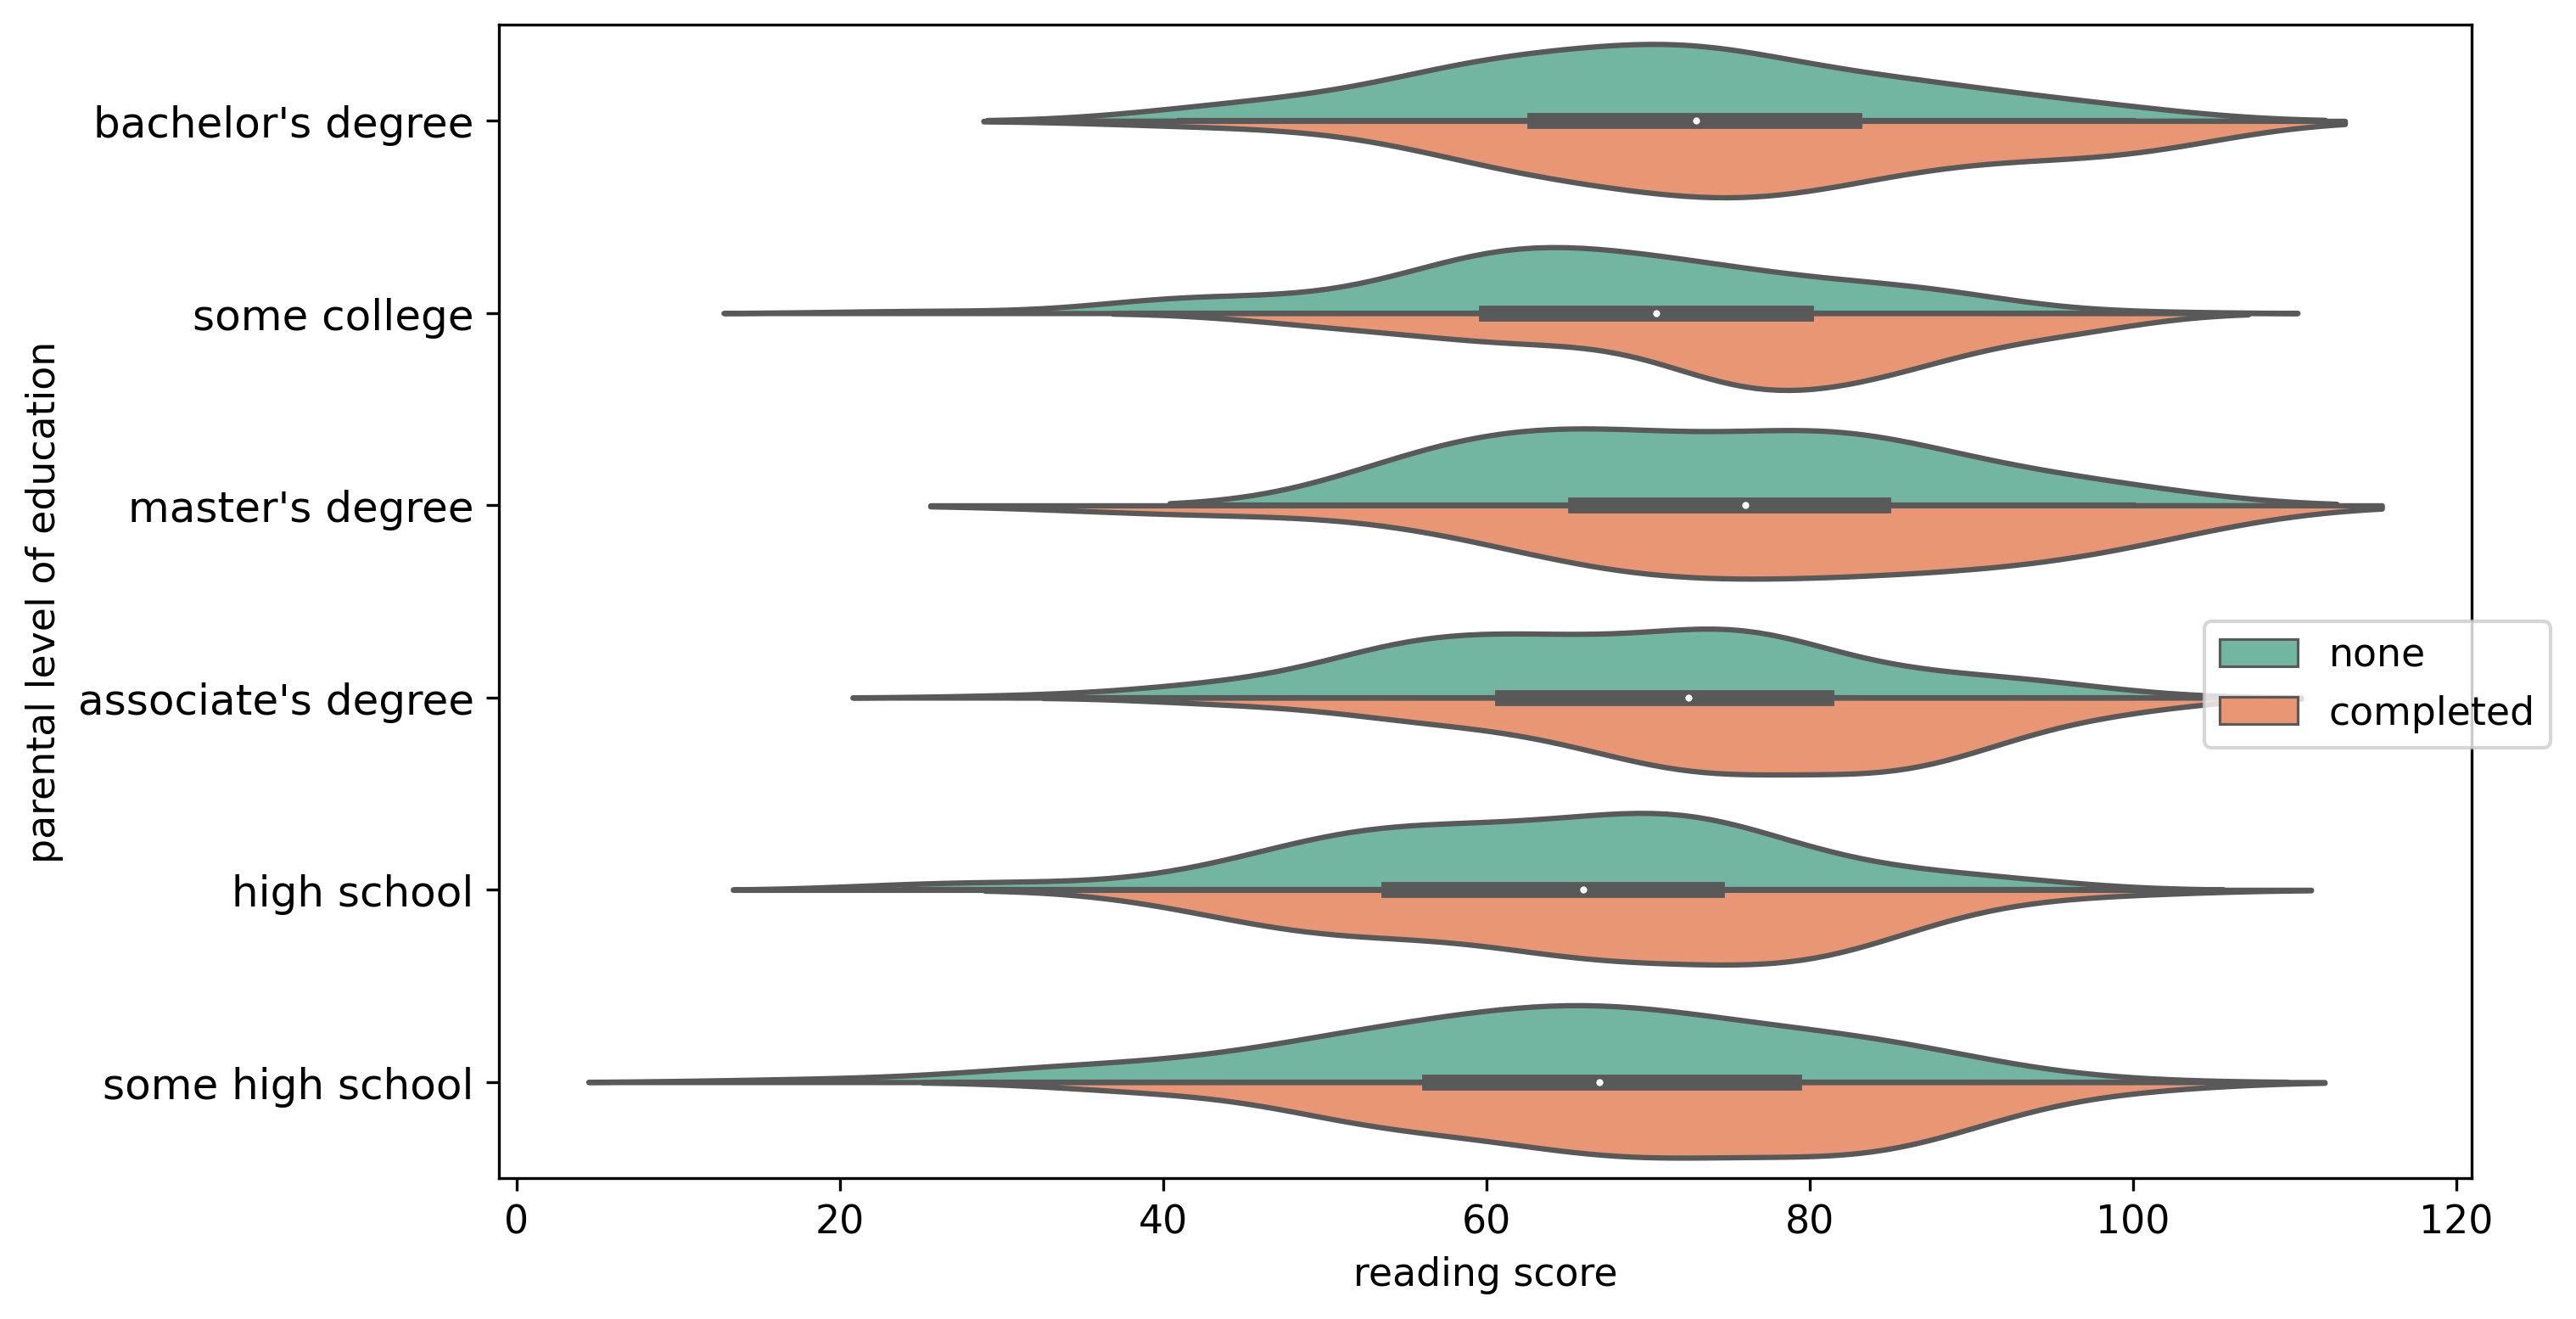

In [47]:
# Separate by the parental level of education category and test preparation course subcategory
# using the split to avoid the problem of one bottom violin touch to other top violin
# split will automatically plot the violin based off the top half of one category and the bottom half of another

plt.figure(figsize=(10,6), dpi=300)
plt.xticks(fontsize=11)
sns.violinplot(data=df, x="reading score", y="parental level of education",
               hue="test preparation course", palette= "Set2", split=True)

# moving the legend
plt.legend(bbox_to_anchor=(1.05, 0.5))

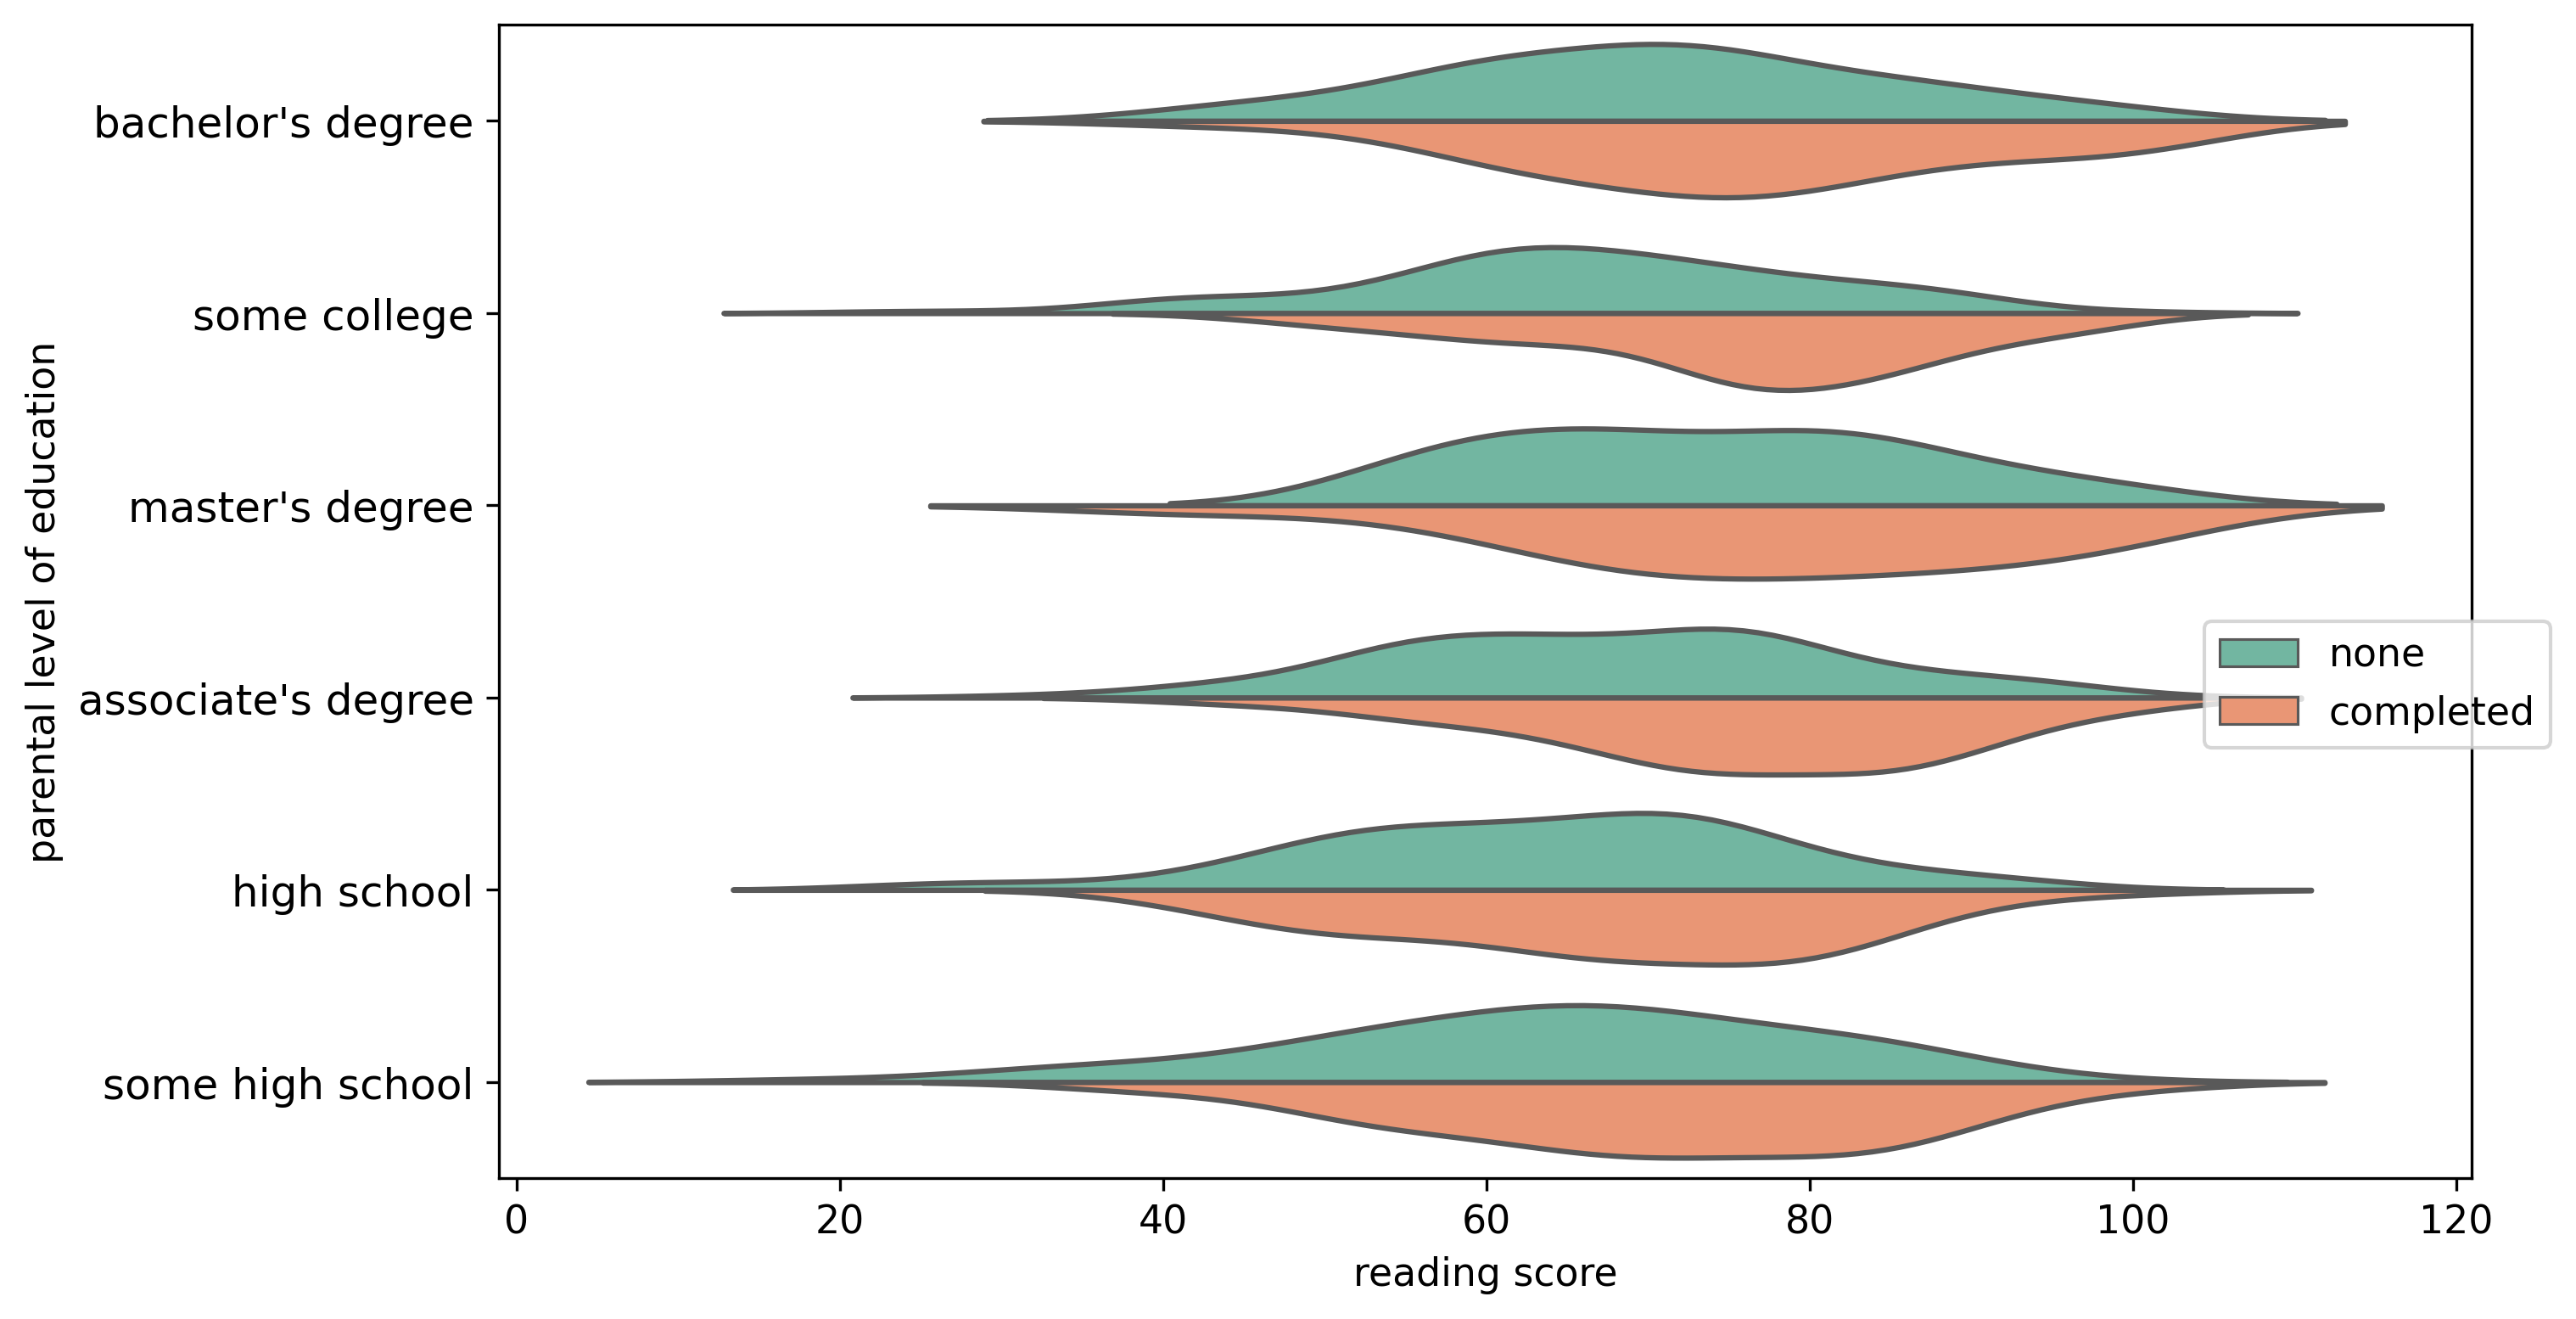

In [48]:
# removing the black bar or black small box
# using the inner = None
plt.figure(figsize=(10,6), dpi=300)
plt.xticks(fontsize=11)
sns.violinplot(data=df, x="reading score", y="parental level of education",
               hue="test preparation course", palette= "Set2", split=True, inner=None)

# moving the legend
plt.legend(bbox_to_anchor=(1.05, 0.5))

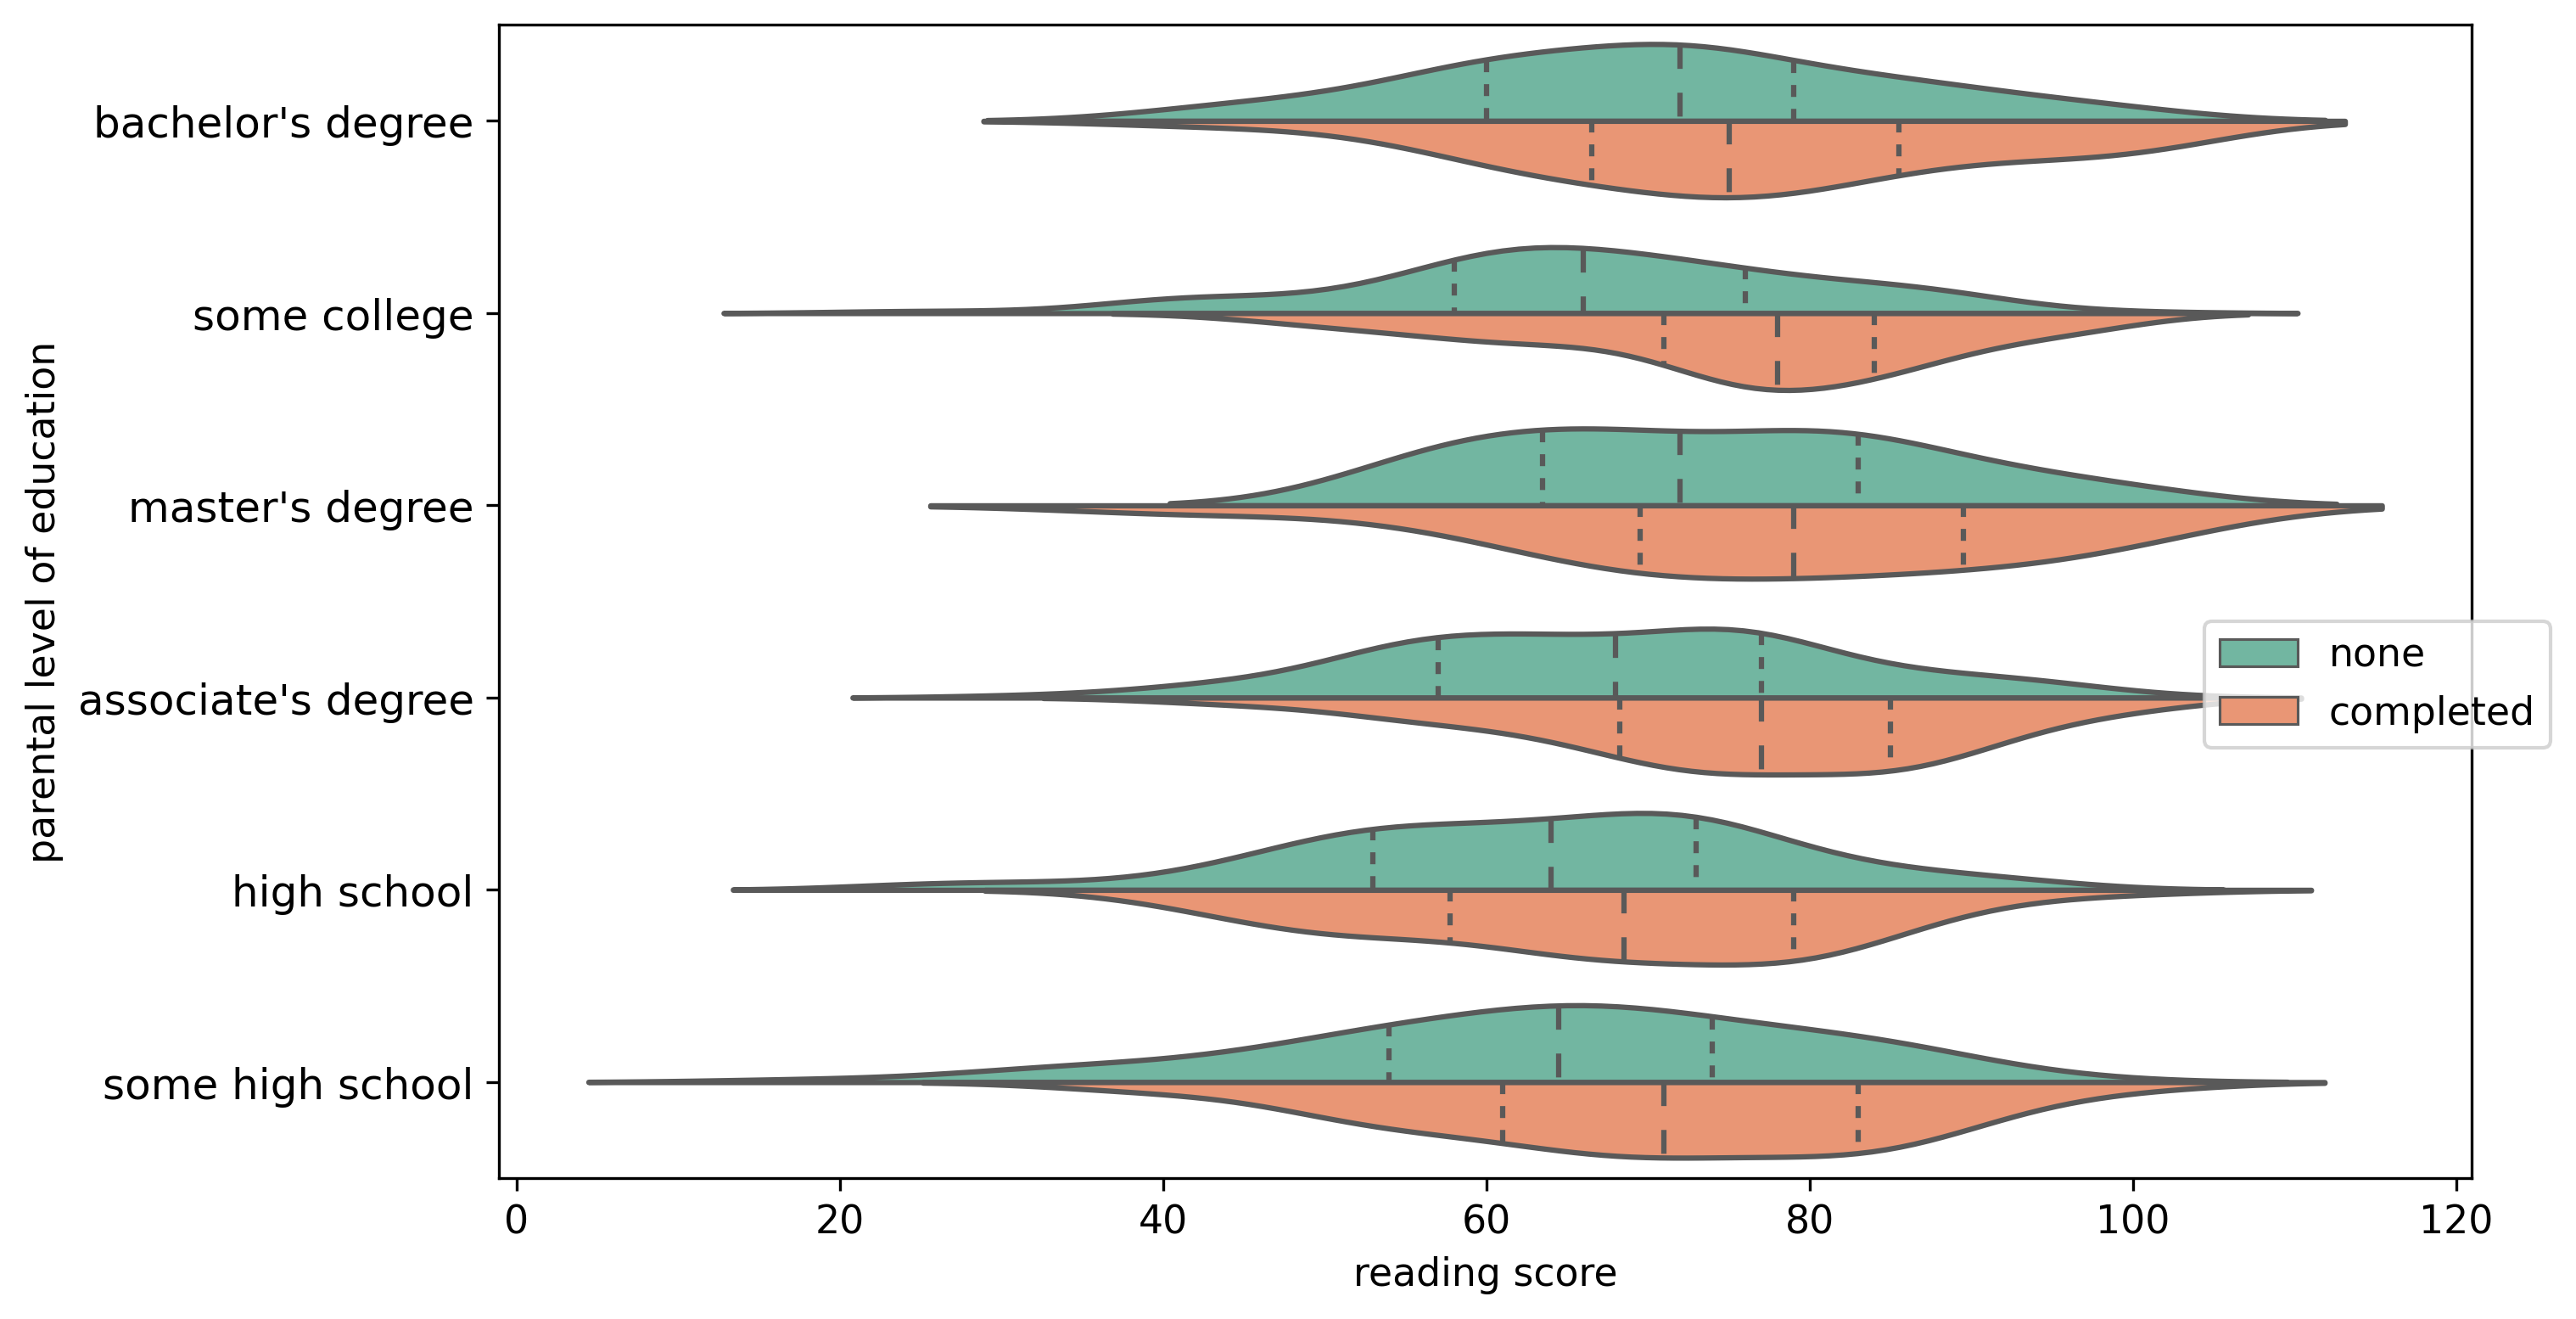

In [49]:
# change the black bar to quartile
# however this could also do not unclear for the audience
# should use without the subcategory
plt.figure(figsize=(10,6), dpi=300)
plt.xticks(fontsize=11)
sns.violinplot(data=df, x="reading score", y="parental level of education",
               hue="test preparation course", palette= "Set2", split=True, inner="quartile")

# moving the legend
plt.legend(bbox_to_anchor=(1.05, 0.5))

<AxesSubplot:xlabel='reading score', ylabel='parental level of education'>

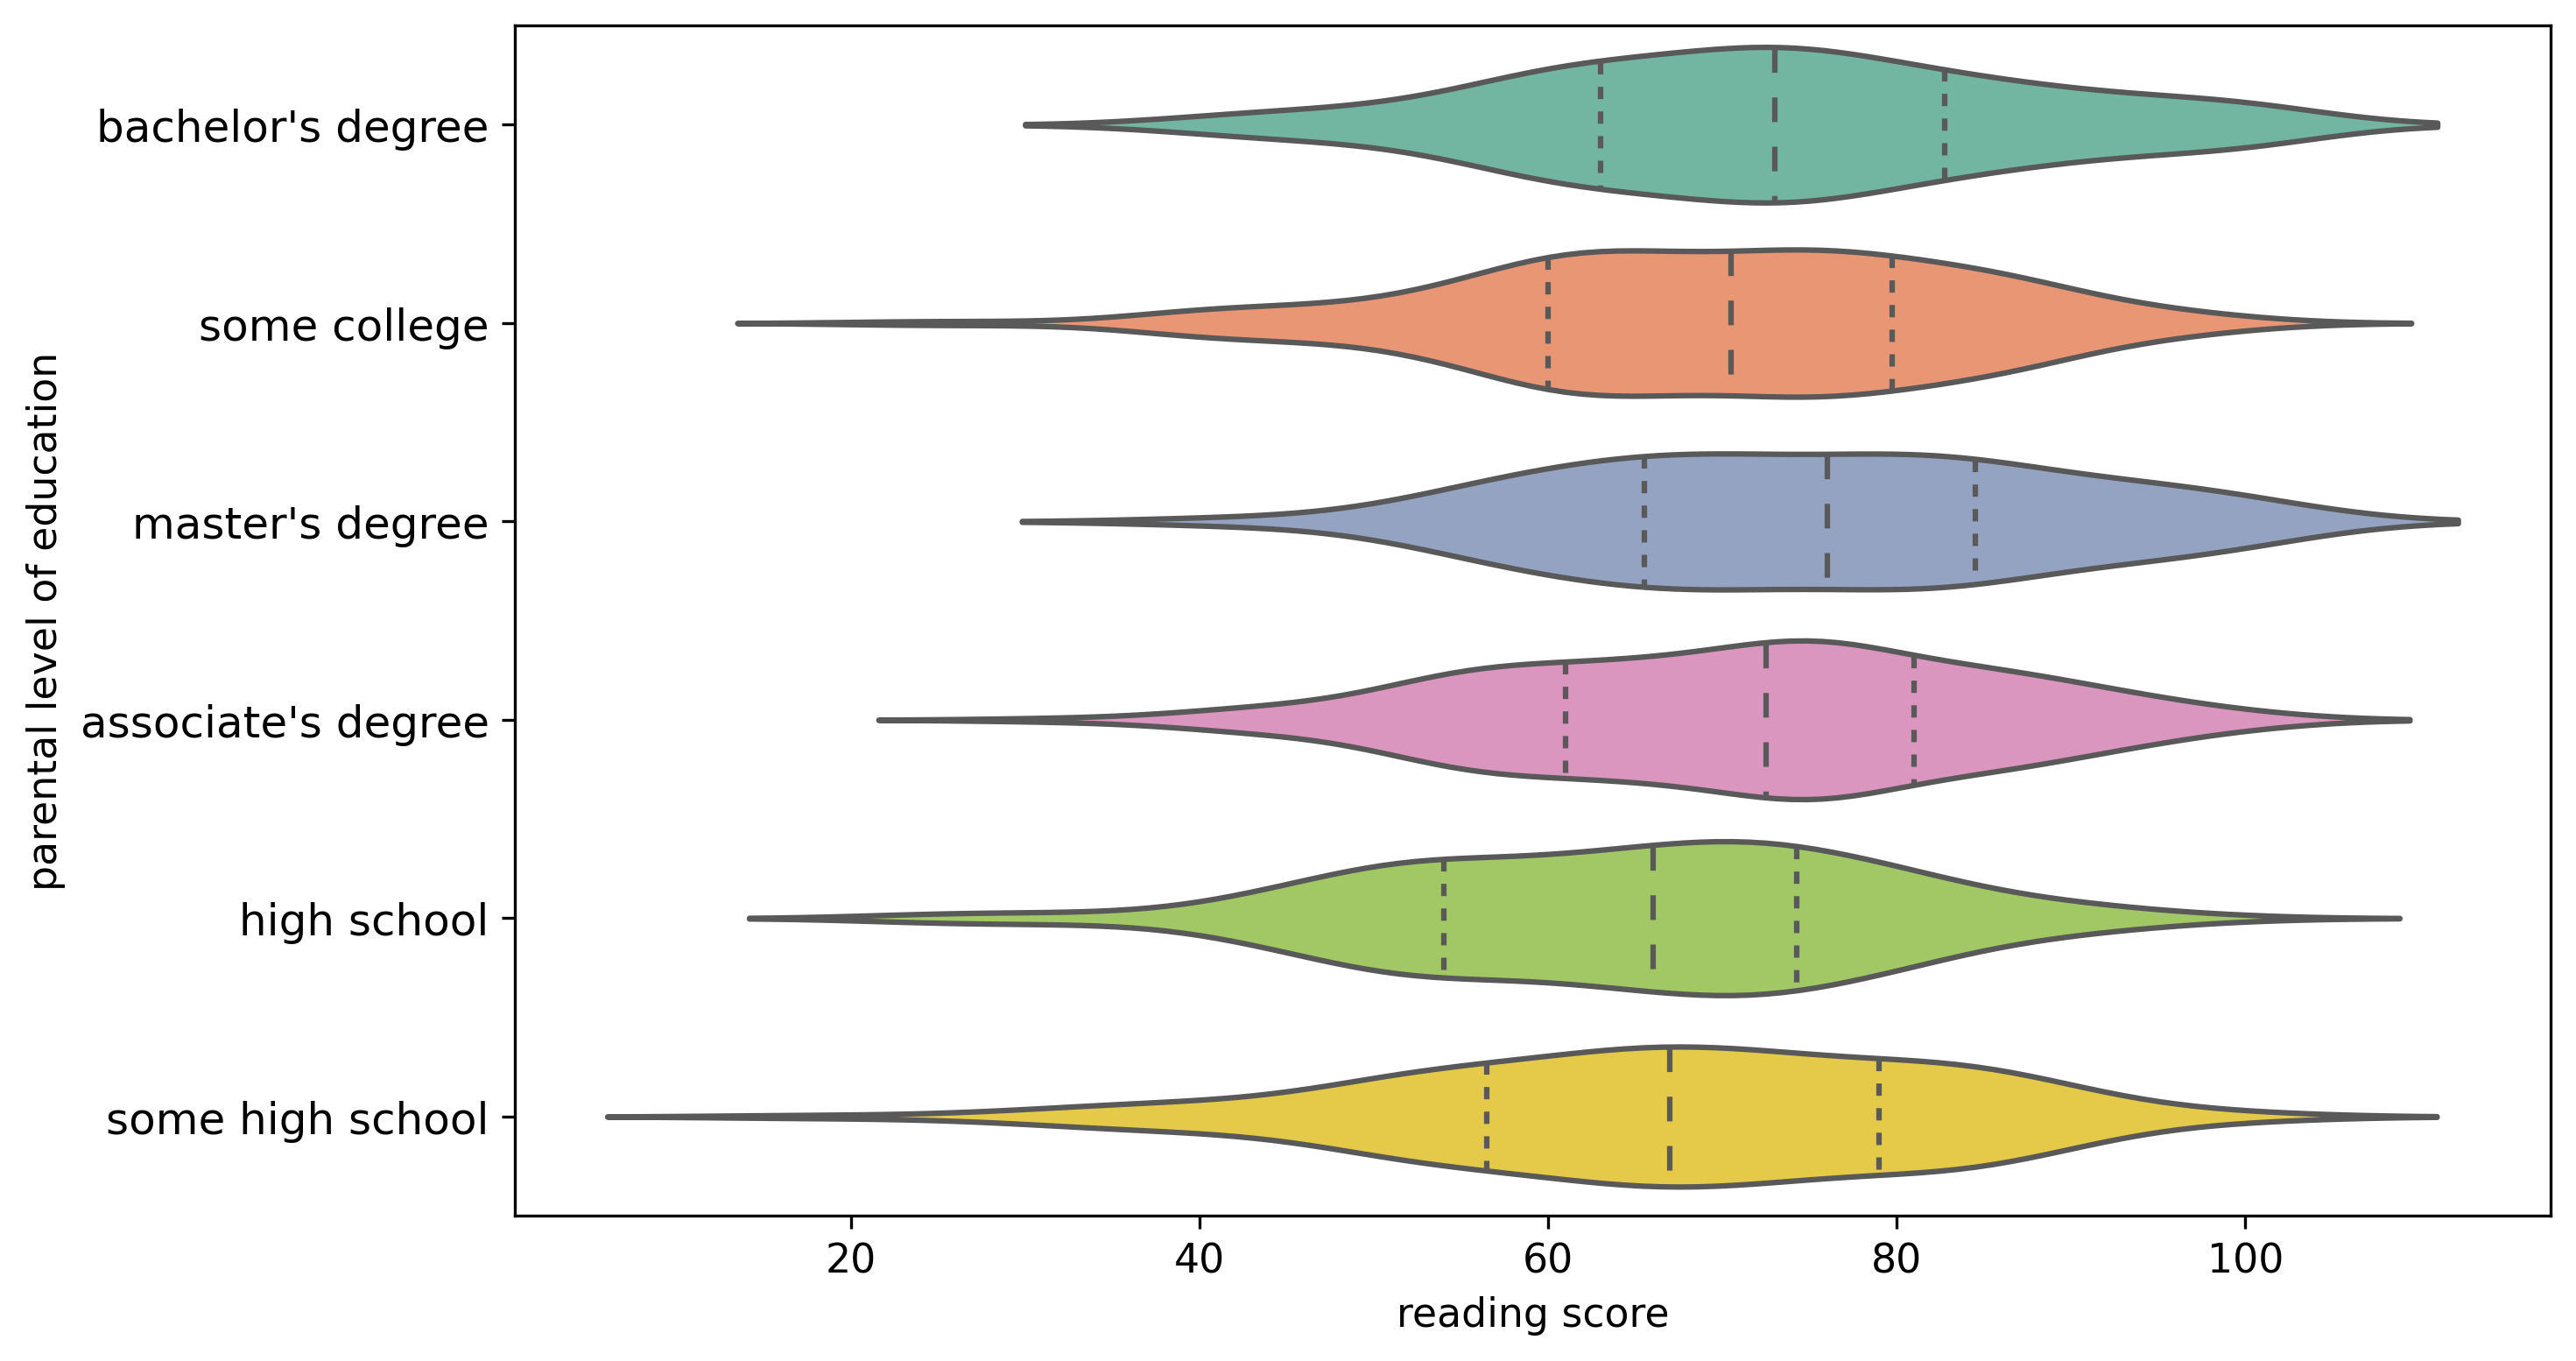

In [53]:
# without subcategory
plt.figure(figsize=(10,6), dpi=300)
plt.xticks(fontsize=11)
sns.violinplot(data=df, x="reading score", y="parental level of education",
              palette= "Set2", split=True, inner="quartile")



<AxesSubplot:xlabel='reading score', ylabel='parental level of education'>

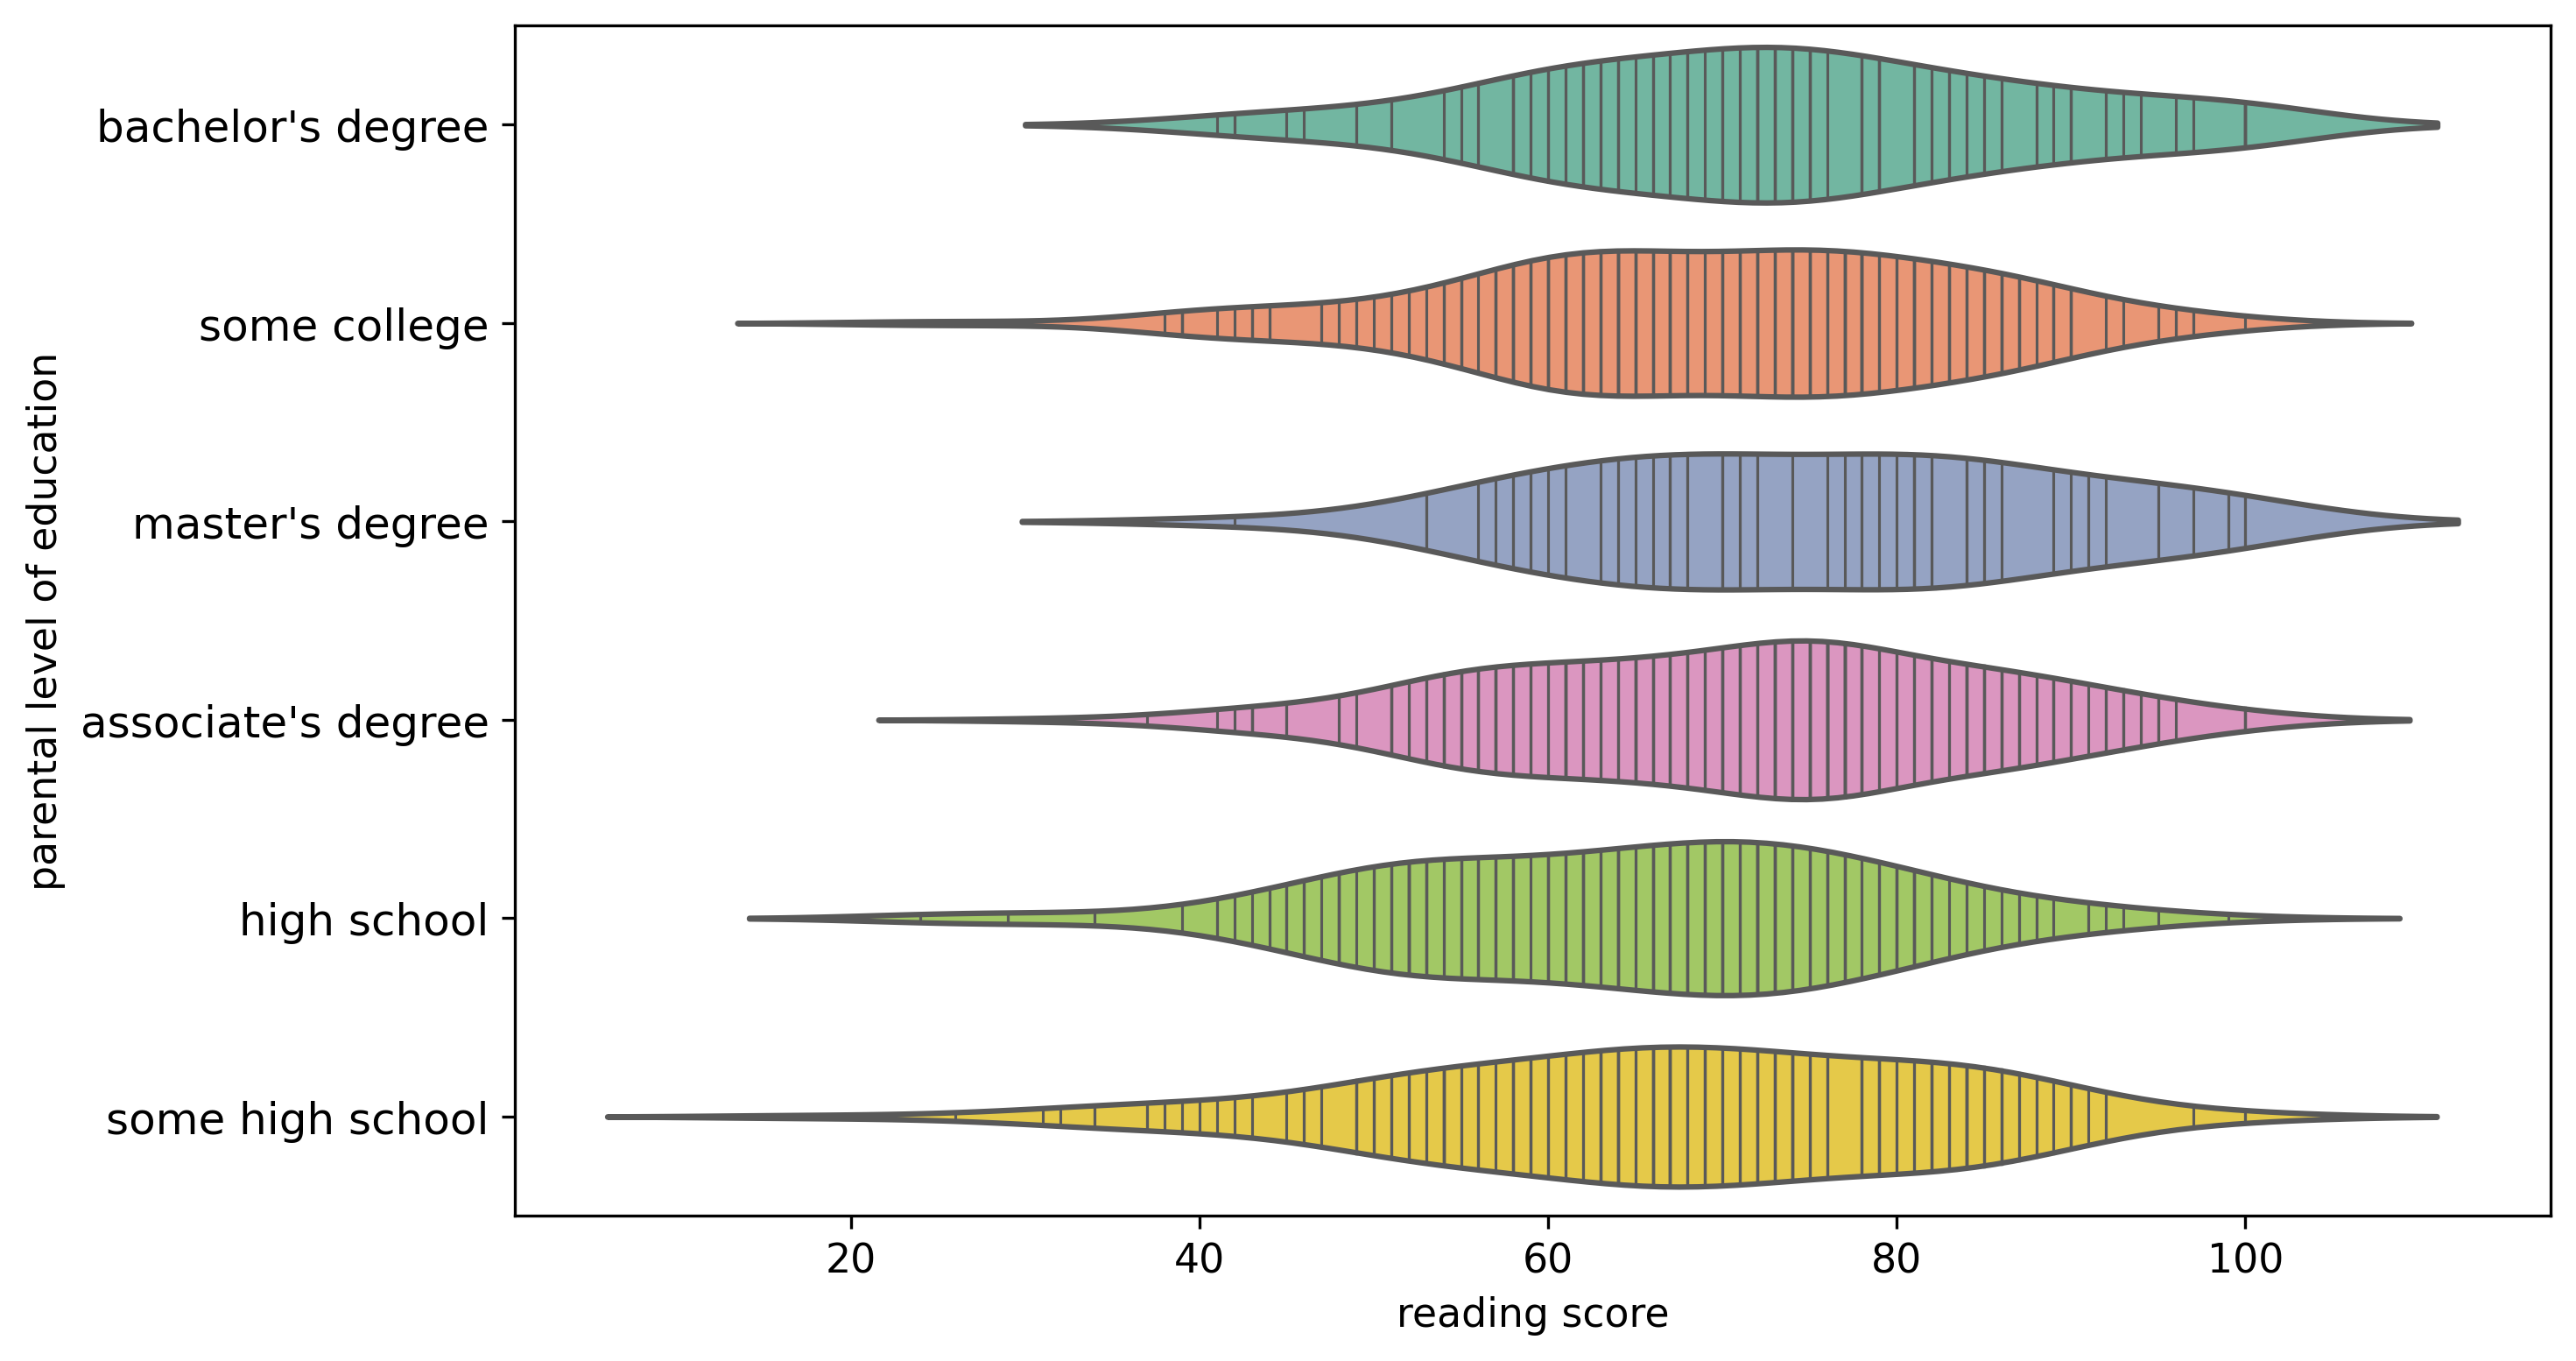

In [54]:
# change the black bar to stick
# show every instances in the figure
plt.figure(figsize=(10,6), dpi=300)
plt.xticks(fontsize=11)
sns.violinplot(data=df, x="reading score", y="parental level of education",
               palette= "Set2", split=True, inner="stick")



<AxesSubplot:xlabel='reading score', ylabel='parental level of education'>

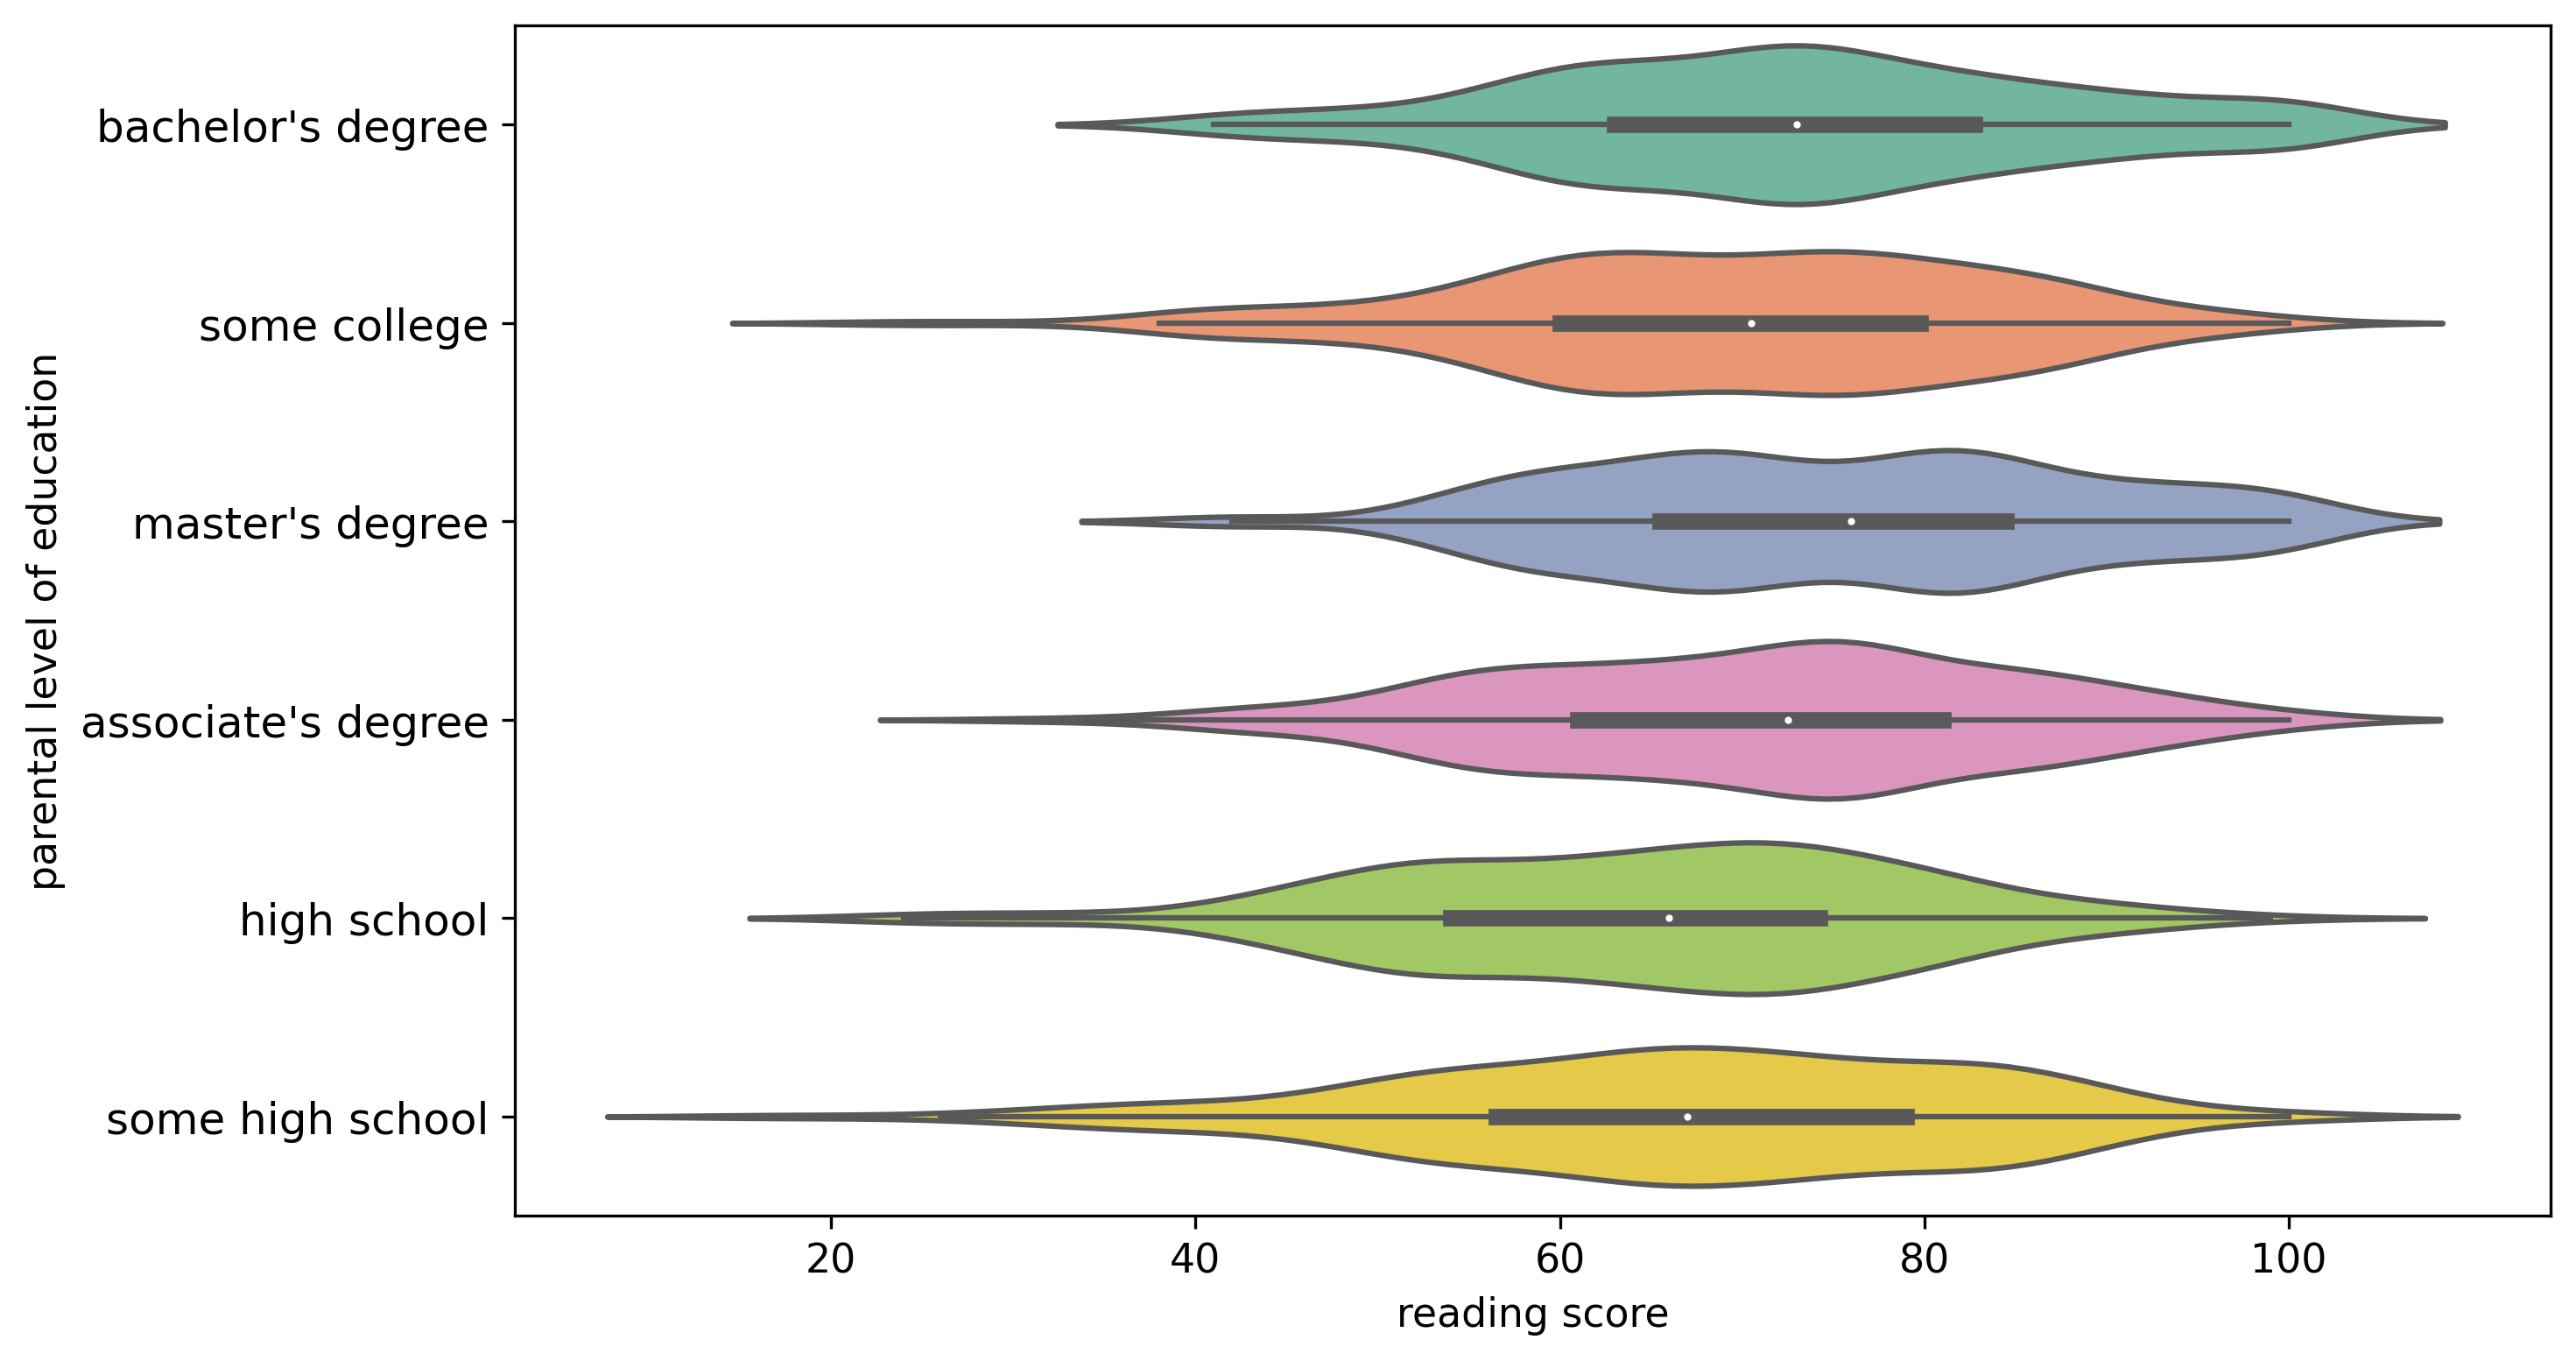

In [58]:
# change the bandwidth - change the noise of the distribution or the width of variance of distribution
# using the bw, bw low -> more noise and vice versa
plt.figure(figsize=(10,6), dpi=300)
plt.xticks(fontsize=11)
sns.violinplot(data=df, x="reading score", y="parental level of education",
               palette= "Set2", split=True, bw=0.3)

##### swarm plot


C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='math score'>

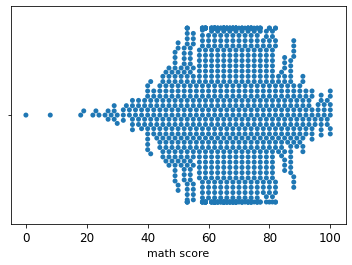

In [59]:
# not from system: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
sns.swarmplot(data=df, x="math score")

<AxesSubplot:xlabel='math score'>

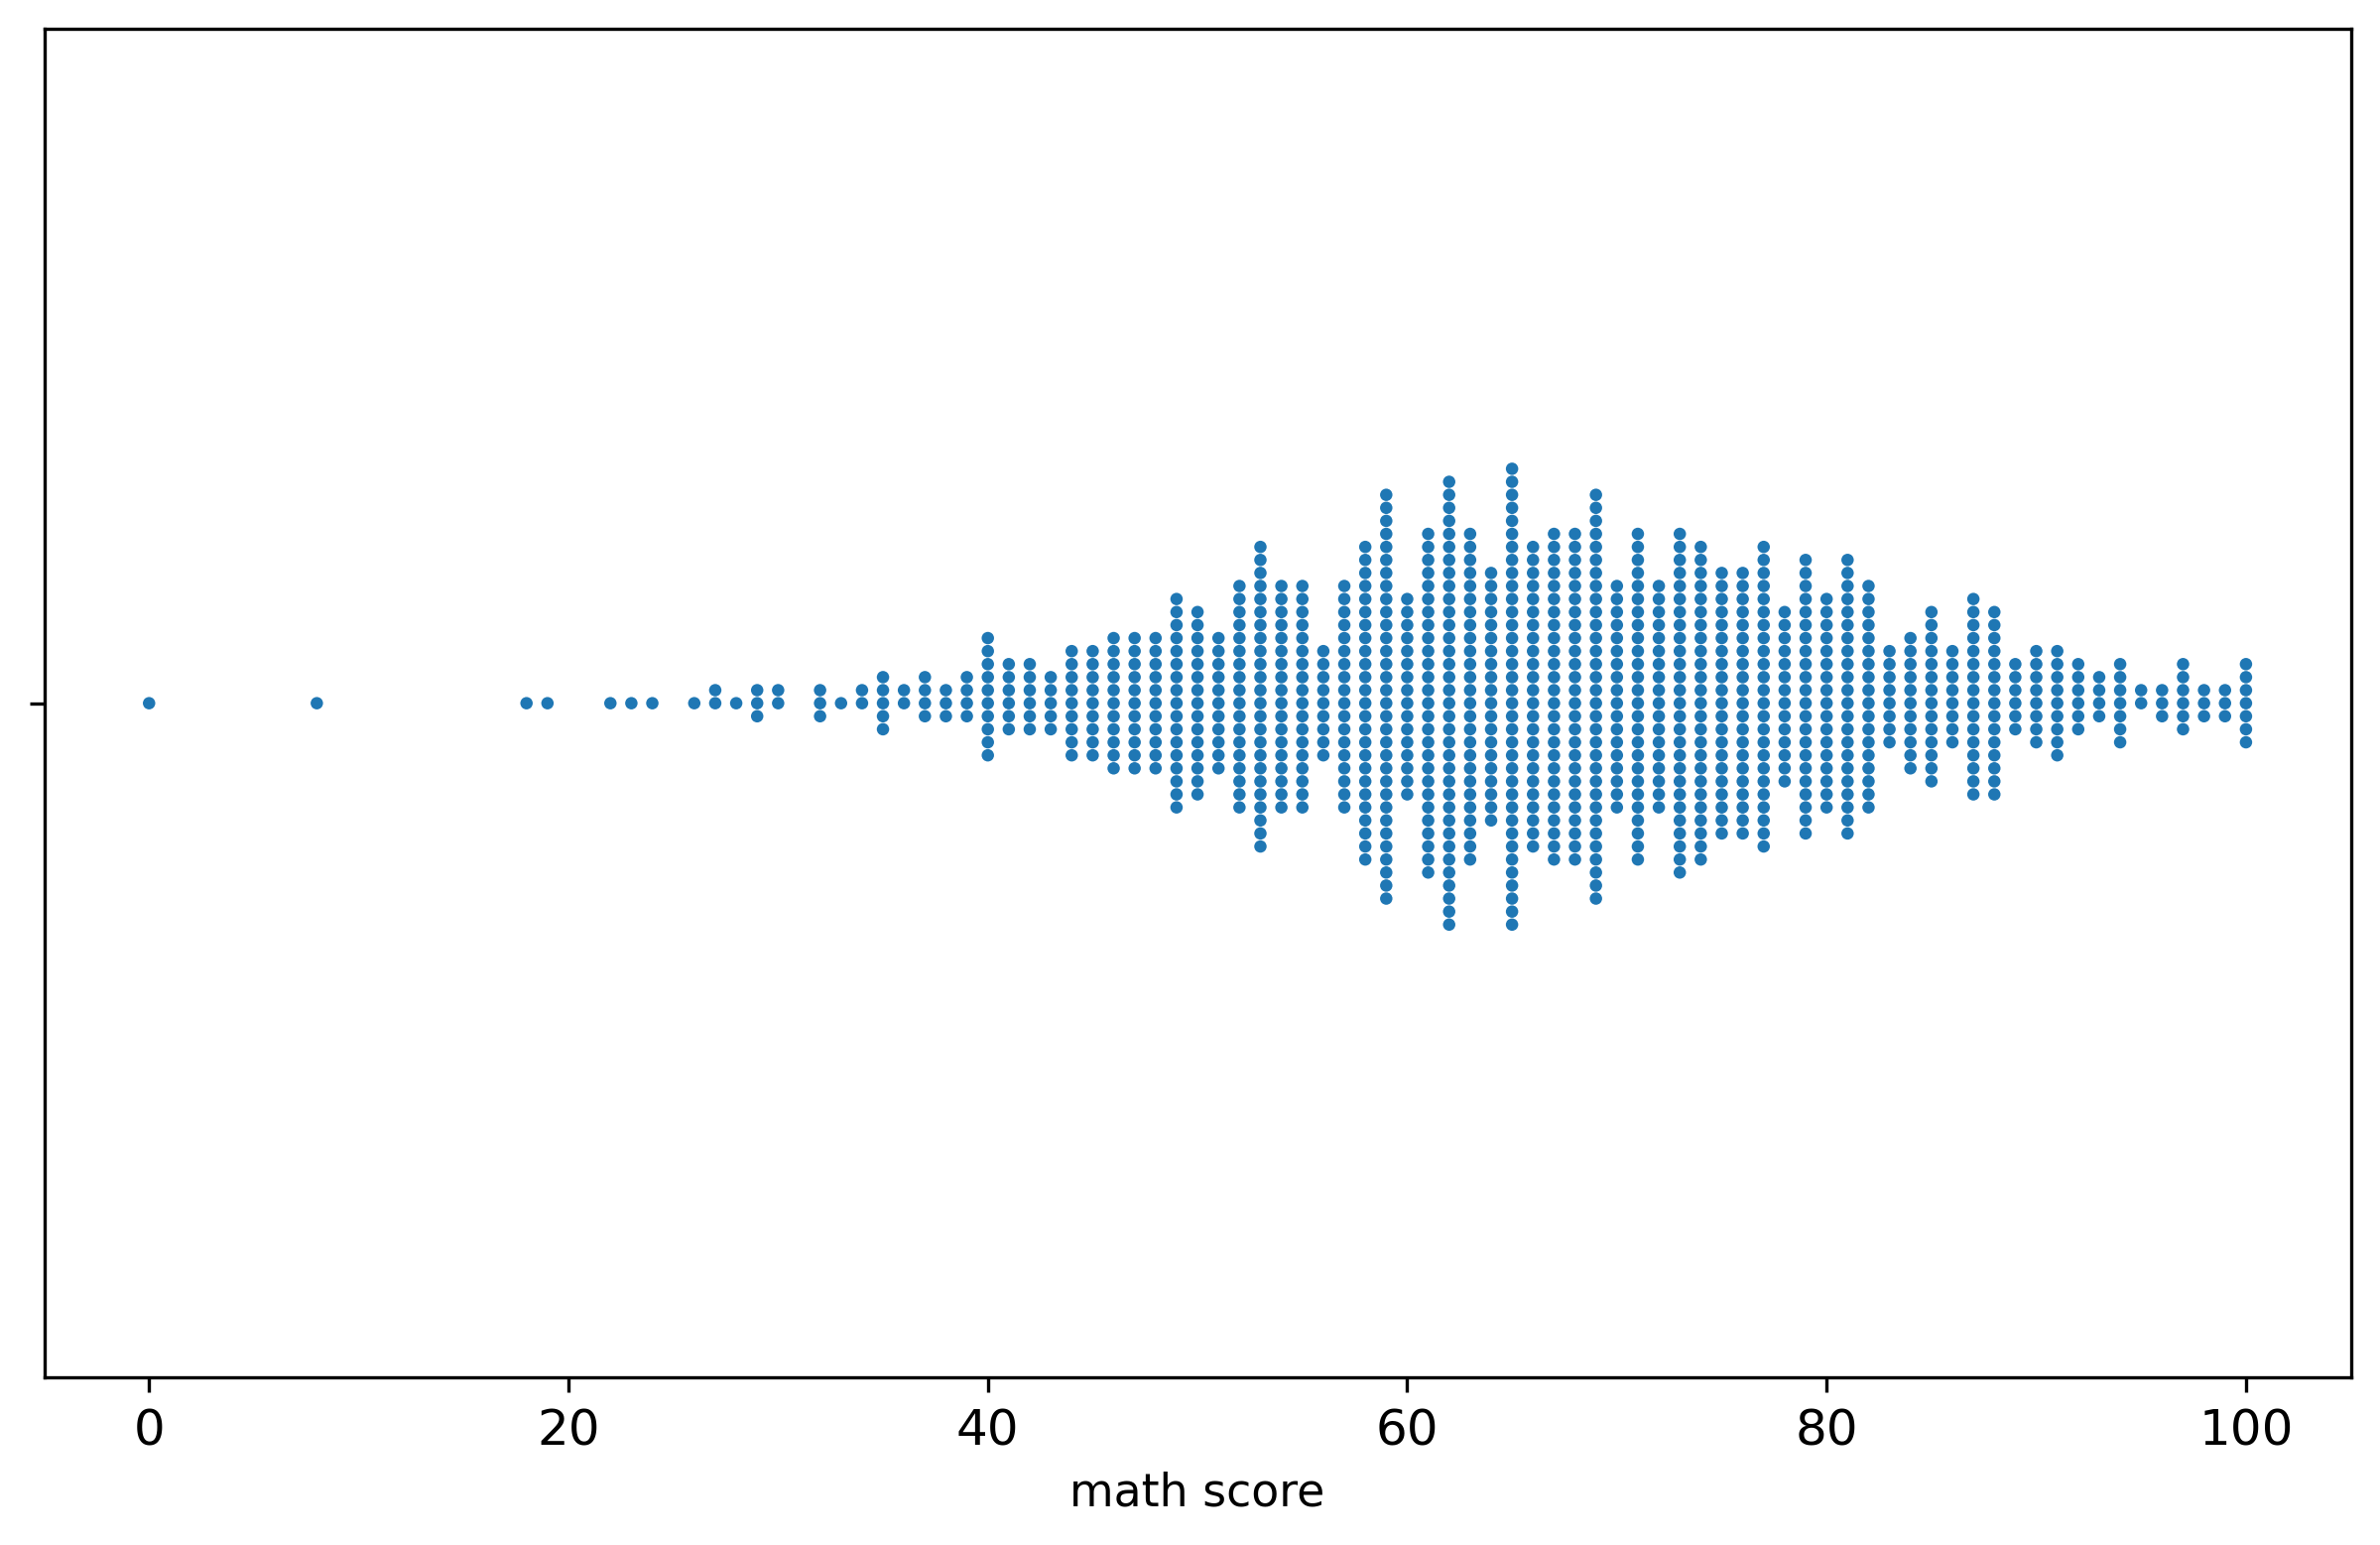

In [66]:
# fix the issues above by changing the size
# using the size=
plt.figure(figsize=(10,6), dpi=300)
sns.swarmplot(data=df, x="math score", size=2)

<AxesSubplot:xlabel='math score', ylabel='gender'>

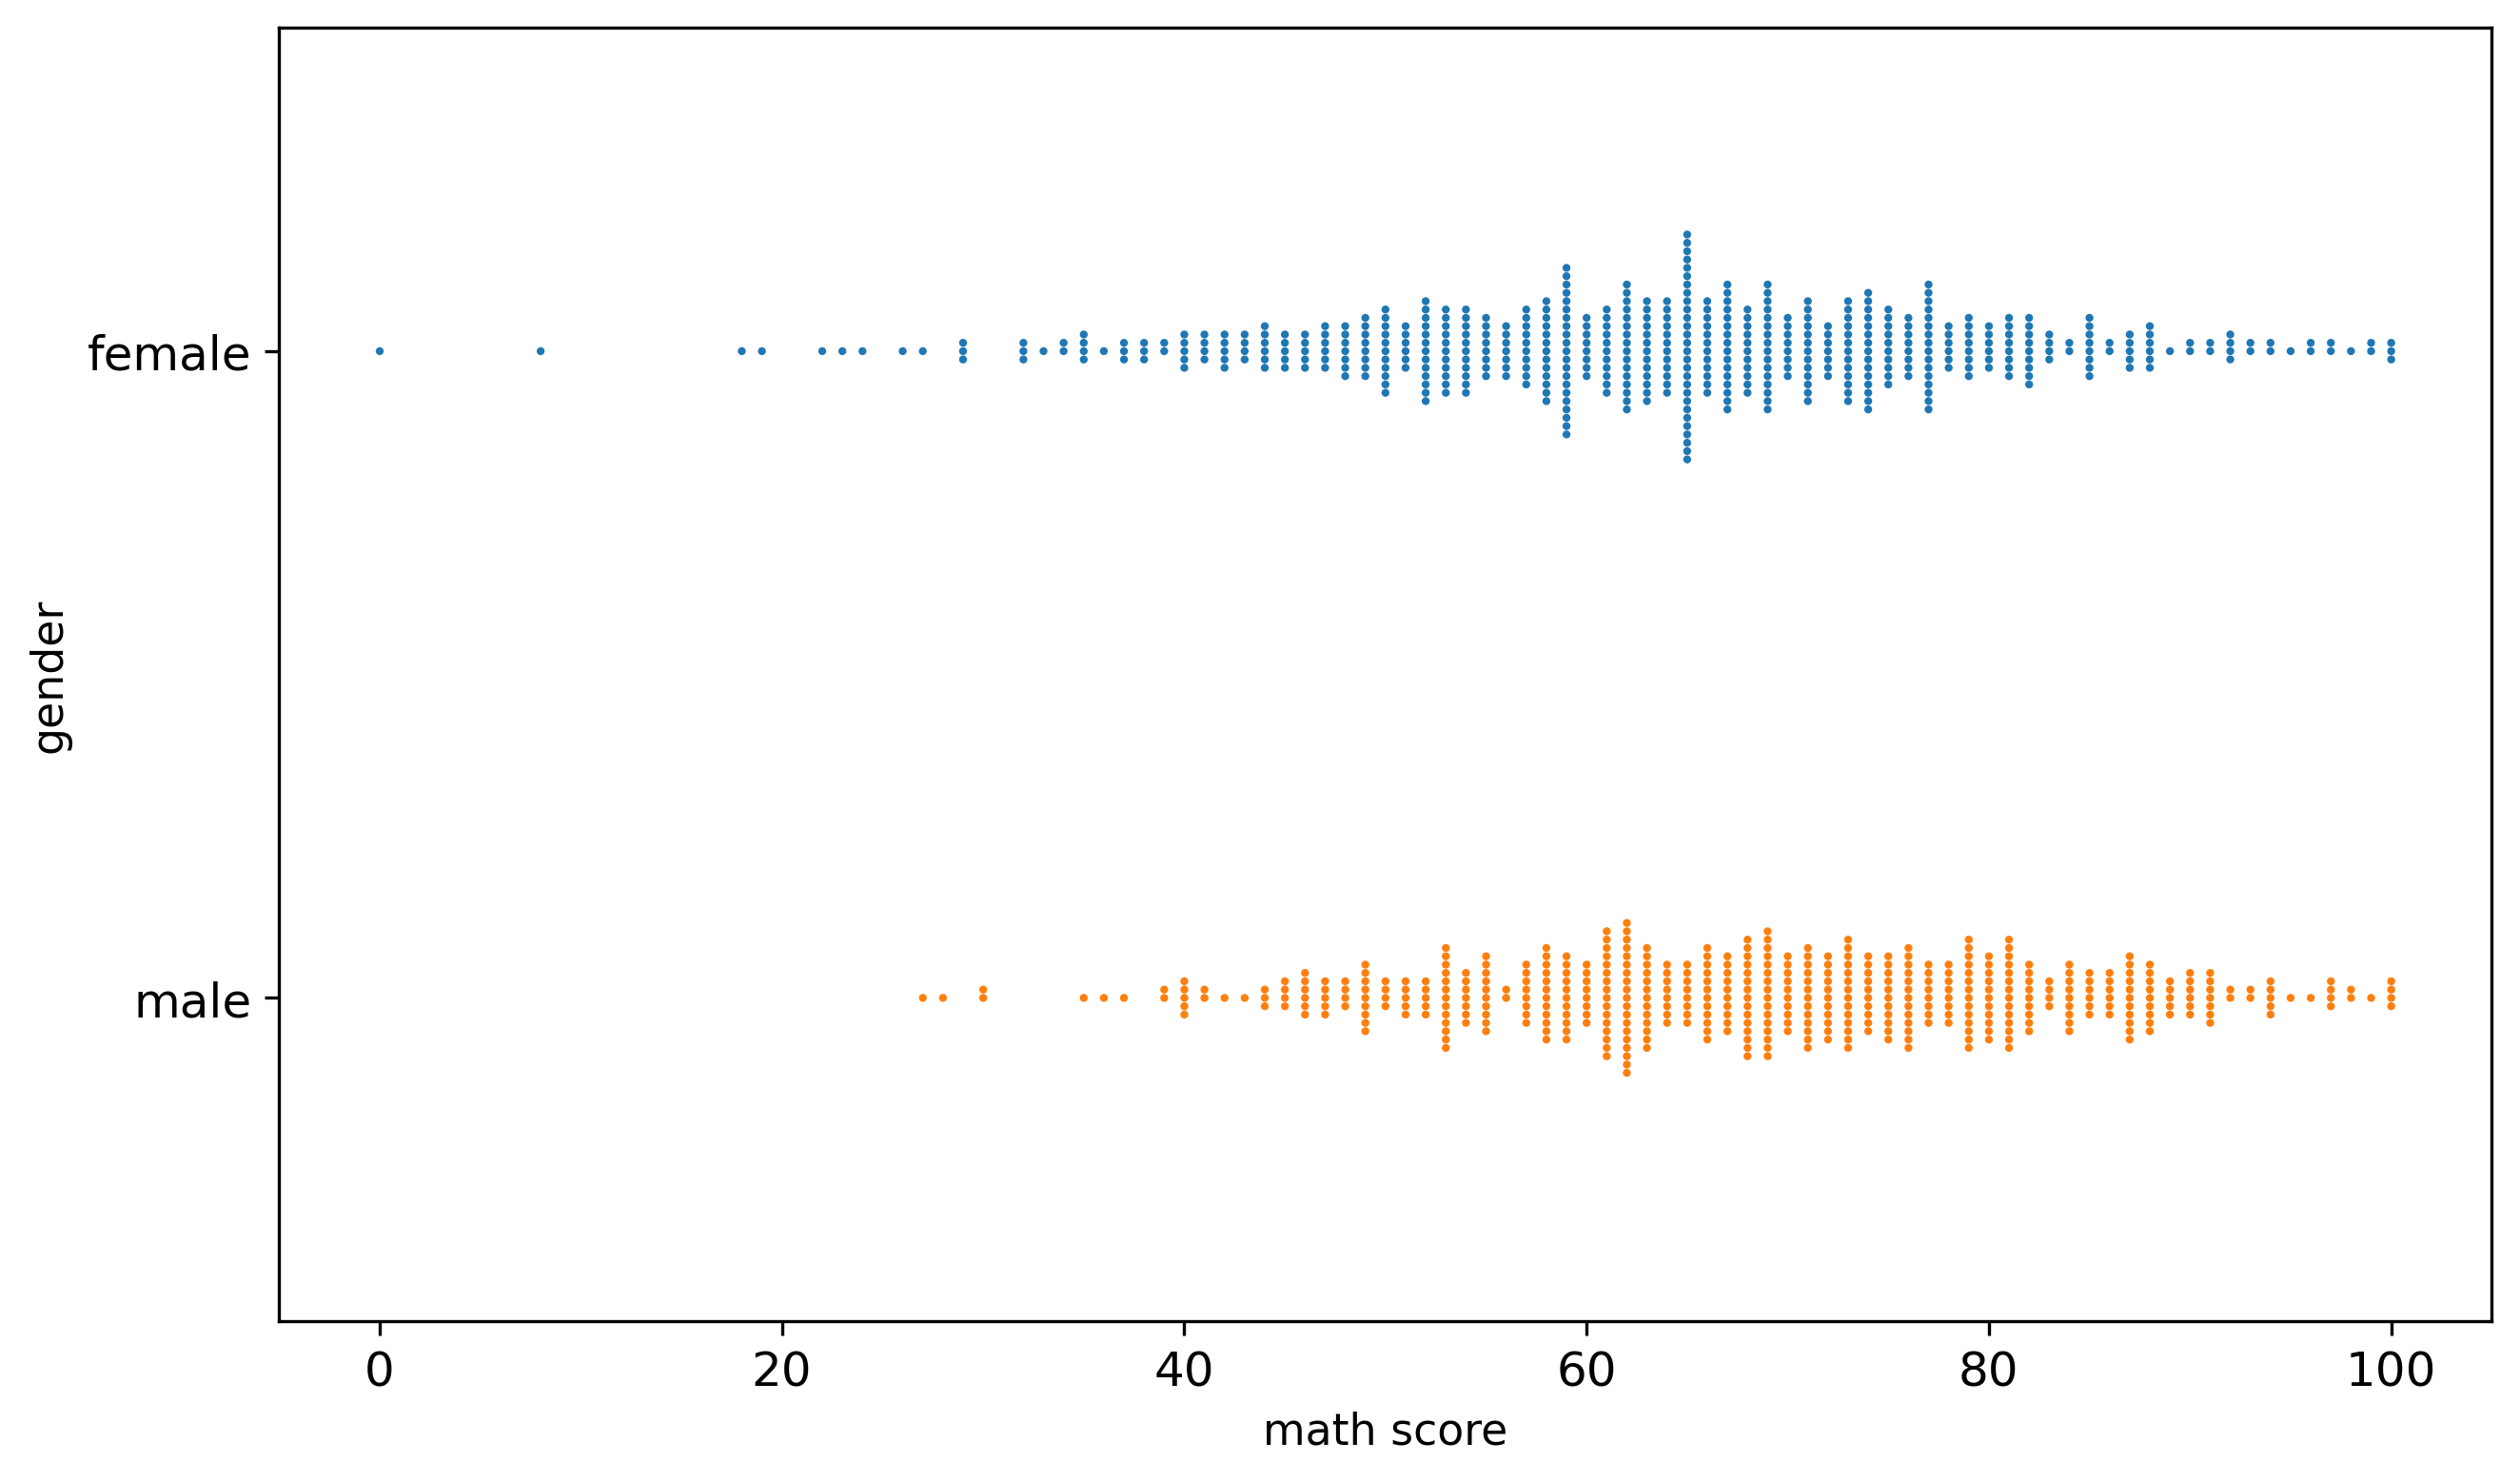

In [68]:
# using the categorical
# separate by the gender
plt.figure(figsize=(10,6), dpi=300)
sns.swarmplot(data=df, x="math score", y="gender", size=2)

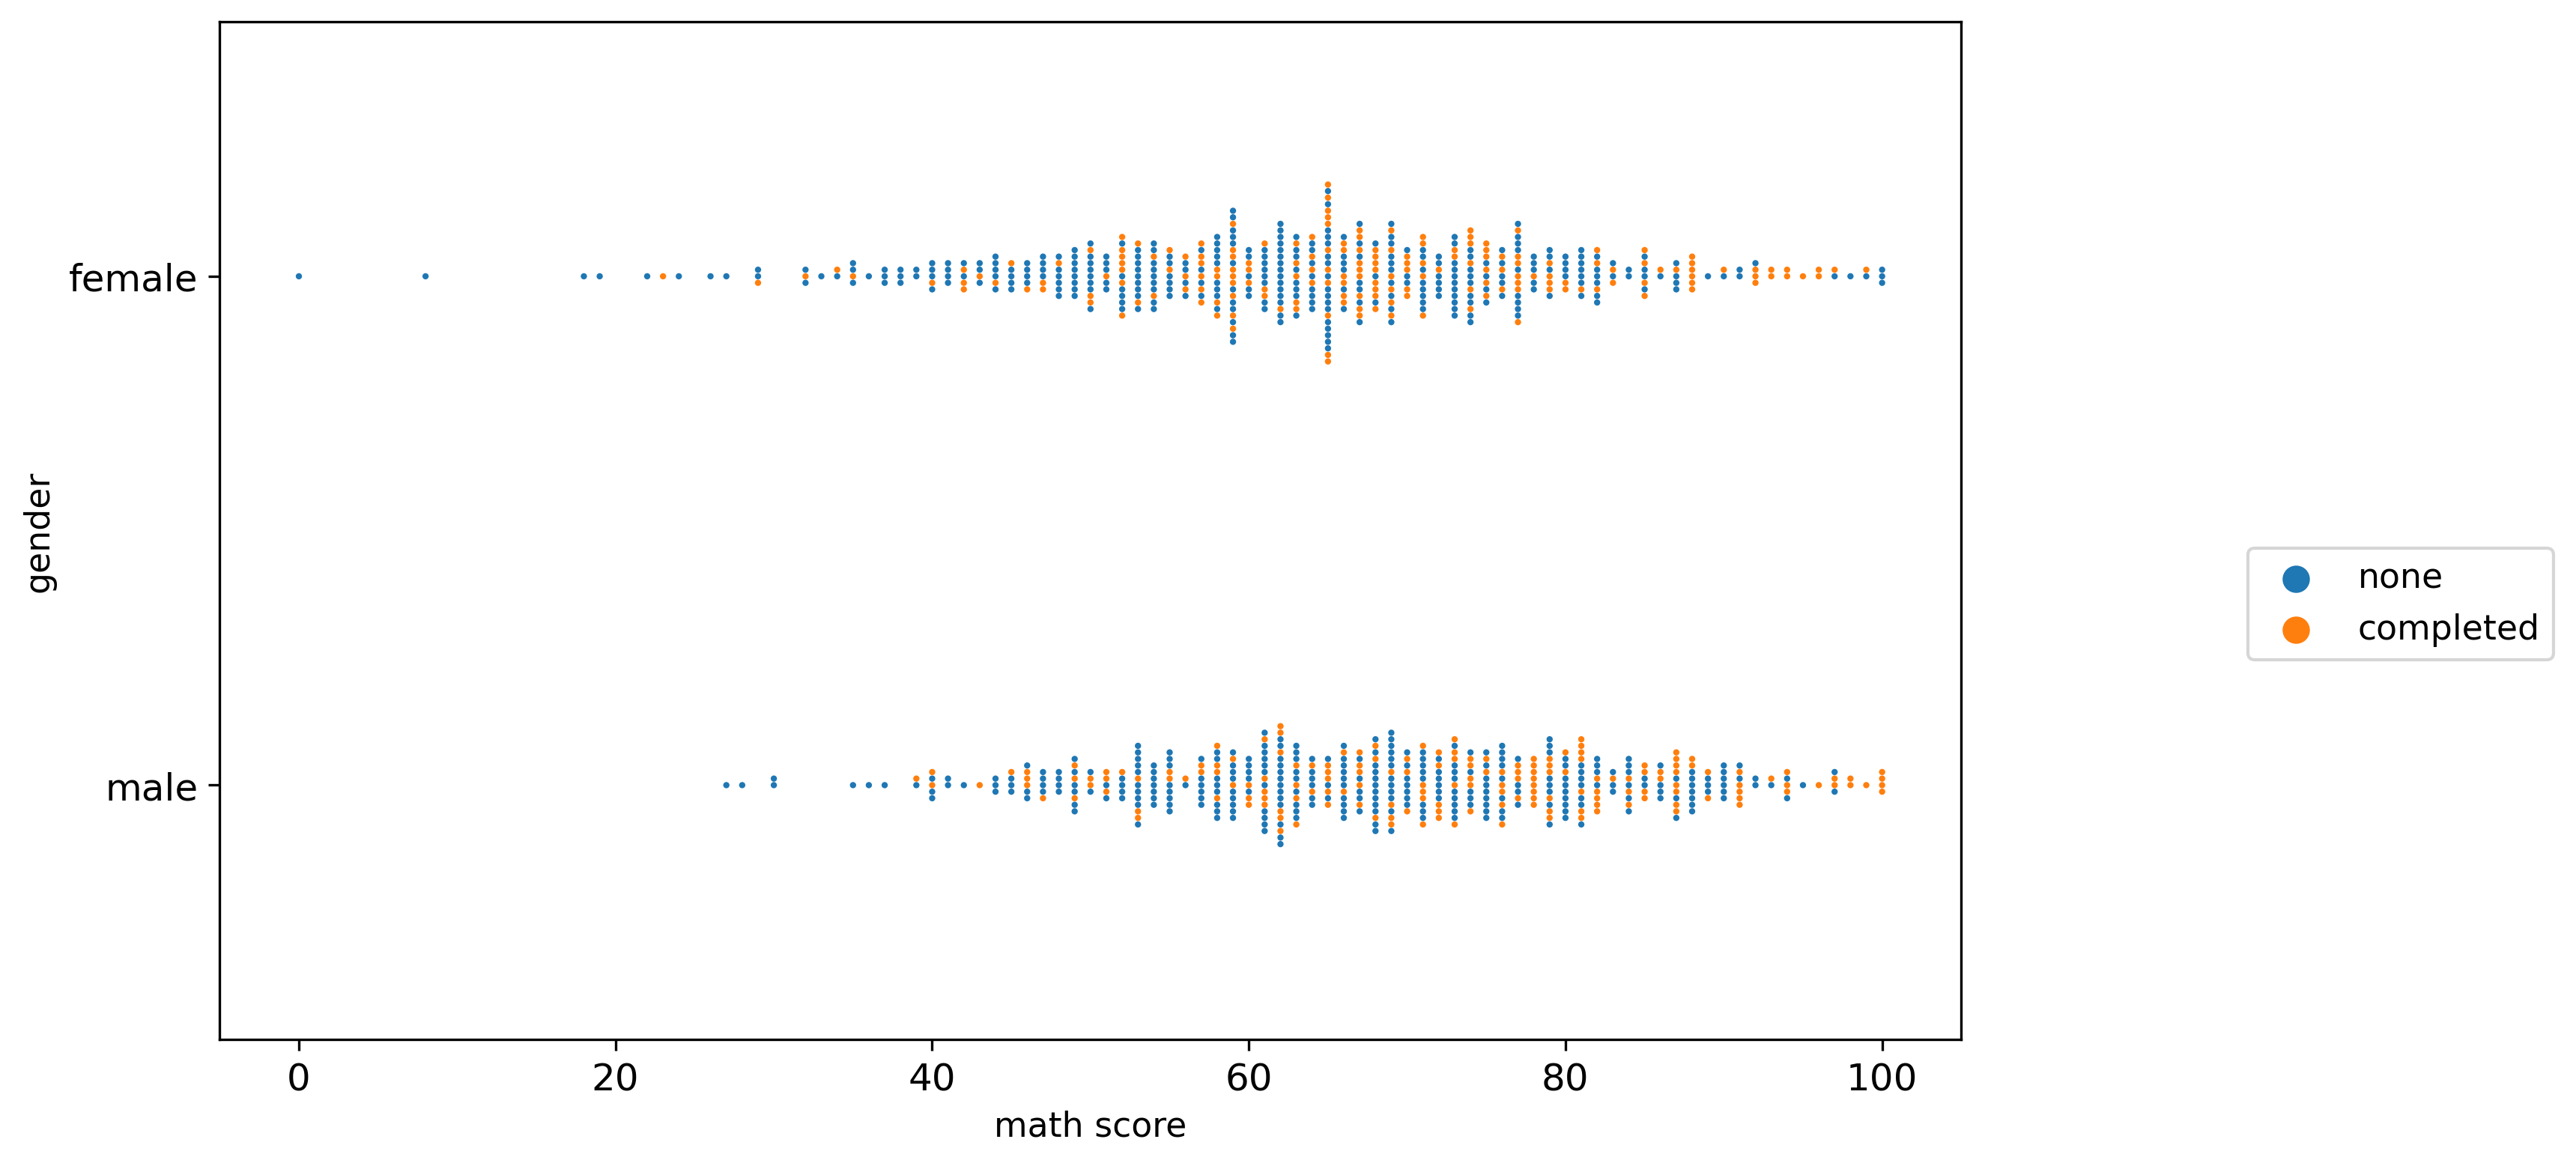

In [70]:
# using hue in this swarm plot is not informative
# This very difficult to read
plt.figure(figsize=(10,6), dpi=300)
sns.swarmplot(data=df, x="math score", y="gender", hue="test preparation course", size=2)

plt.legend(bbox_to_anchor = (1.35, 0.5))

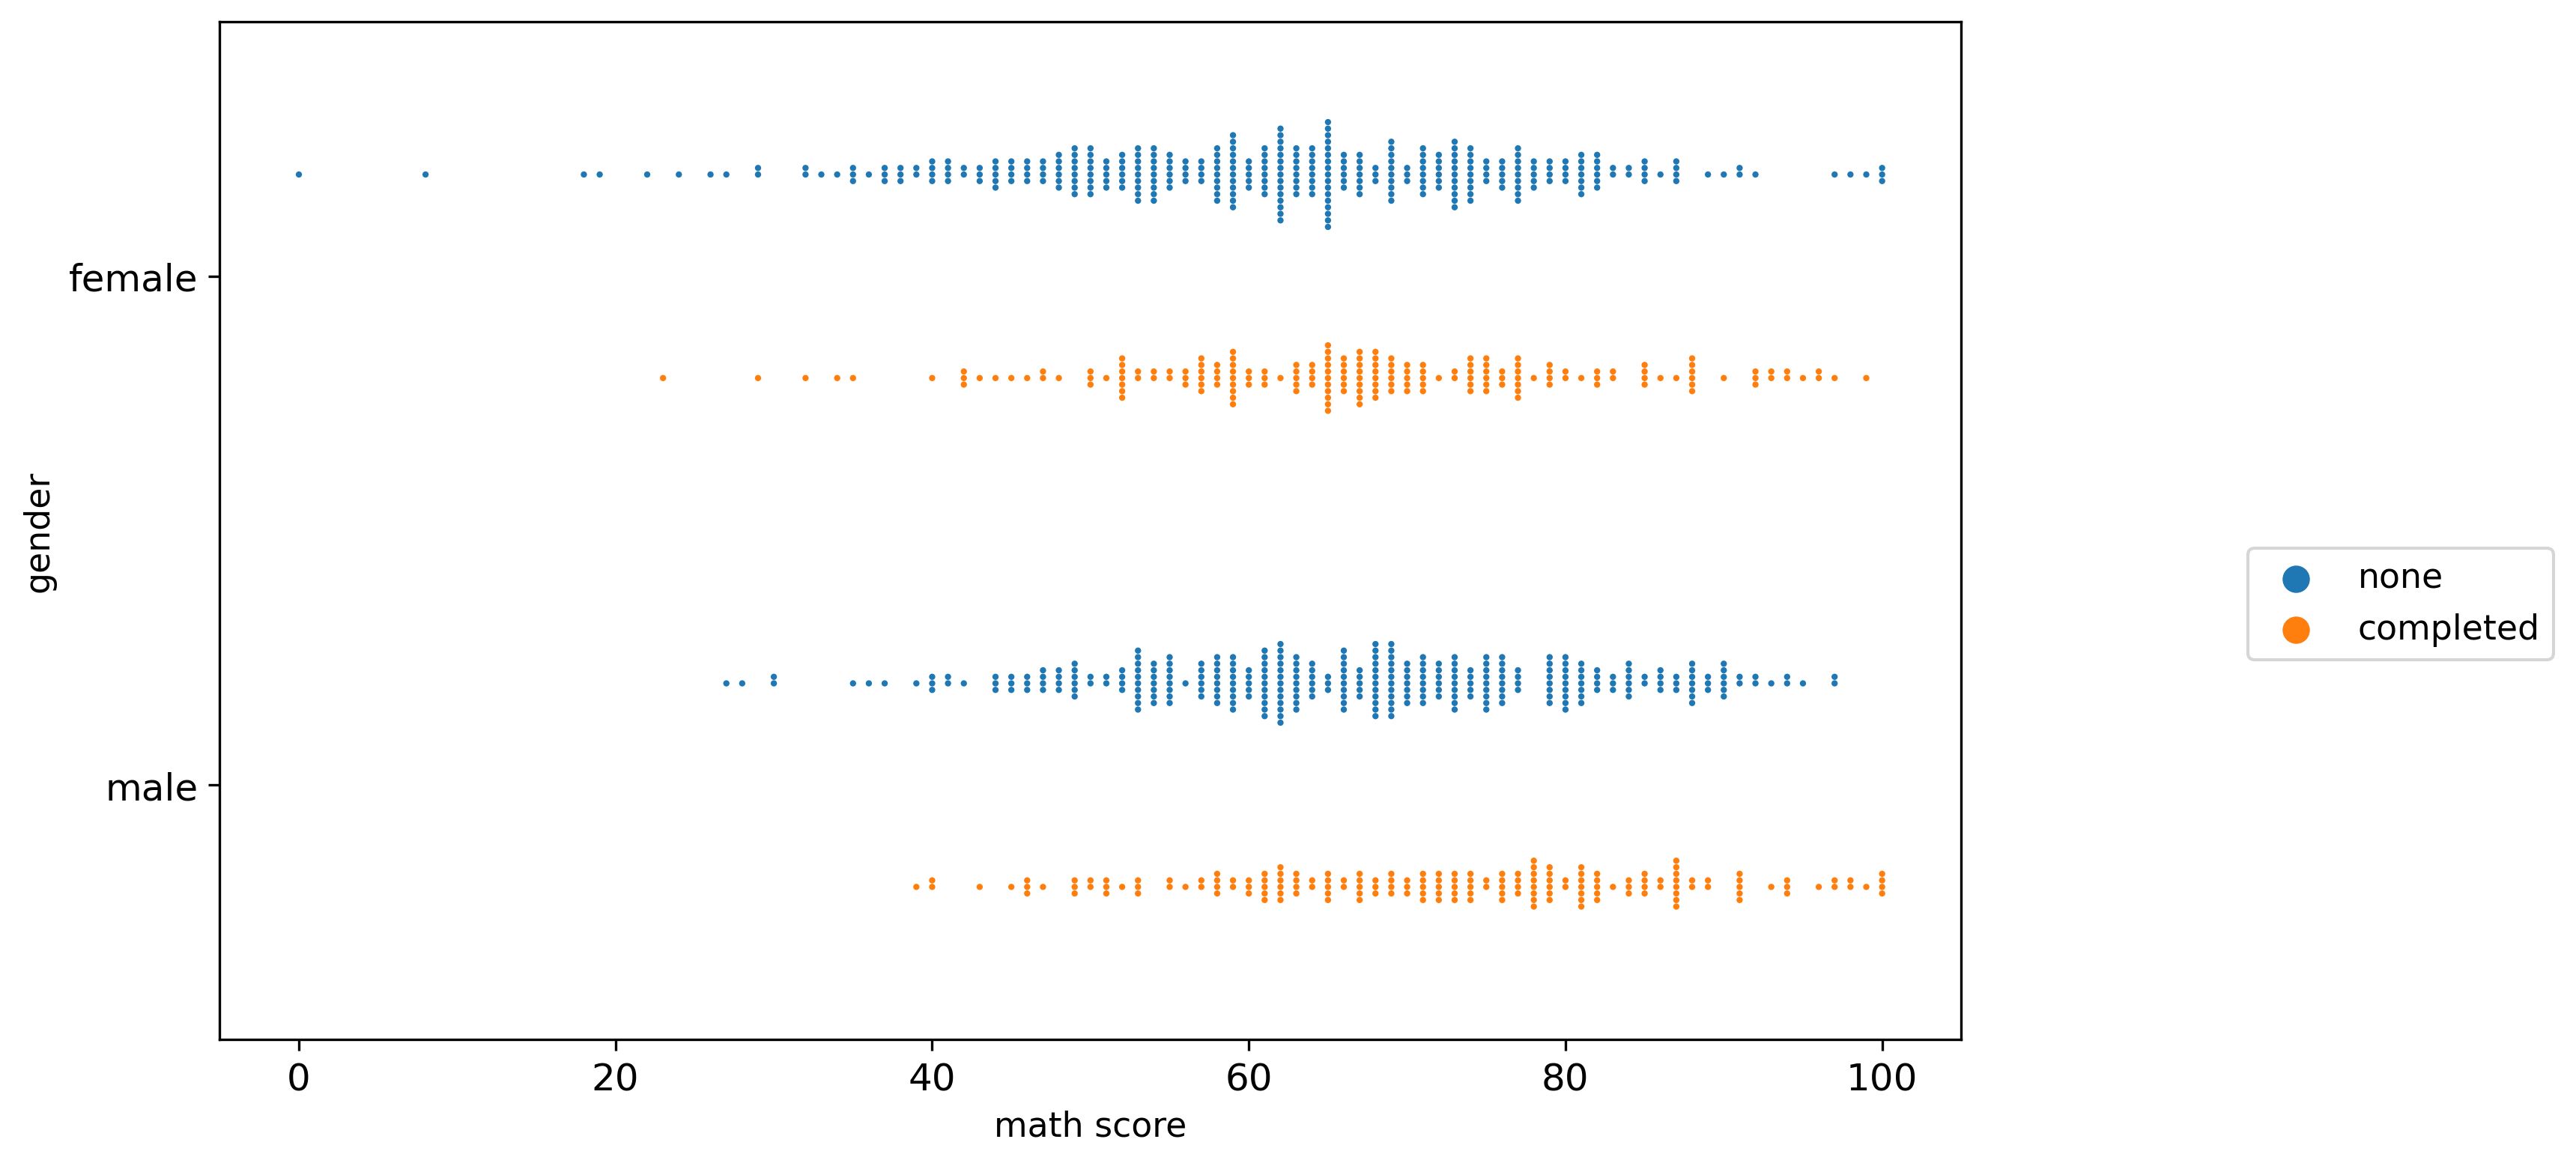

In [71]:
# fix the above issue by using the dodge
# it split up the swarmplot into the second swarmplot based on the hue
plt.figure(figsize=(10,6), dpi=300)
sns.swarmplot(data=df, x="math score", y="gender", hue="test preparation course", size=2, dodge=True)

plt.legend(bbox_to_anchor = (1.35, 0.5))

##### Boxenplot

<AxesSubplot:xlabel='math score', ylabel='test preparation course'>

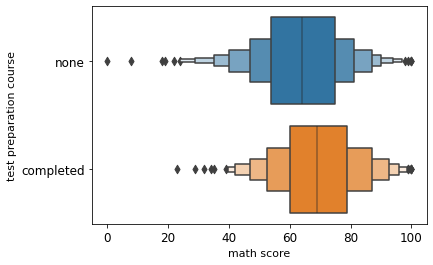

In [72]:
sns.boxenplot(x='math score', y="test preparation course", data=df)

<AxesSubplot:xlabel='math score', ylabel='test preparation course'>

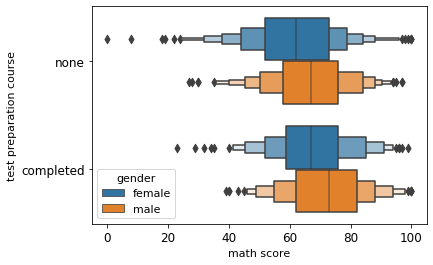

In [73]:
sns.boxenplot(x='math score', y="test preparation course", hue="gender", data=df)
